# **1. Data import & basic EDA**

## *1.1 Import data from Drive*

In [ ]:
import pandas as pd
import requests
from io import StringIO

# Define the file ID of the CSV file on Google Drive
file_id = "1dWUCVCfk3ZrJPIWVHg4FBVgIqESzzjZ1"

# Construct the direct download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Make a GET request to fetch the CSV file from Google Drive
response = requests.get(url)

# Read the content of the CSV file
content = response.content.decode('utf-8')

# Load the CSV content into a DataFrame
df = pd.read_csv(StringIO(content))

# Display the DataFrame
df.head()


,Comment Text,Publish Date,Source
0,Thank you for your suggestion??! \nPlease know...,"12/17/2023, 3:39:09 PM",Instagram
1,We hear you??! \nEnsuring a safe and effective...,"12/17/2023, 3:41:48 PM",Instagram
2,"hi, Can you recommend a skincare for Acne for ...","12/17/2023, 9:40:43 PM",Instagram
3,now that you have established customers. pleas...,"12/17/2023, 11:19:41 PM",Instagram
4,Cannot wait for this launch ??,"12/18/2023, 6:05:10 PM",Instagram


##*1.2 Basic EDA*

In [ ]:
# Display the first few rows of the DataFrame
print("First 5 rows:")
print(df.head())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Information about the DataFrame
print("\nDataFrame information:")
print(df.info())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Check data types of columns
print("\nData types:")
print(df.dtypes)

# Number of unique values in each column
print("\nUnique value counts:")
print(df.nunique())


First 5 rows:
                                        Comment Text             Publish Date  \
0  Thank you for your suggestion??! \nPlease know...   12/17/2023, 3:39:09 PM   
1  We hear you??! \nEnsuring a safe and effective...   12/17/2023, 3:41:48 PM   
2  hi, Can you recommend a skincare for Acne for ...   12/17/2023, 9:40:43 PM   
3  now that you have established customers. pleas...  12/17/2023, 11:19:41 PM   
4                     Cannot wait for this launch ??   12/18/2023, 6:05:10 PM   

      Source  
0  Instagram  
1  Instagram  
2  Instagram  
3  Instagram  
4  Instagram  

Summary statistics:
                                    Comment Text      Publish Date     Source
count                                     150267            151914     151914
unique                                    100975            103990          3
top     #EucerinAOXEssence for 97% smoother skin  04/08/2021 21:54  Instagram
freq                                        2337               595      9101

#**2. Data Preprocessing**

##2.1 General data Preprocessing

###*2.1.1 Remove NULL*

In [ ]:
# Drop rows where 'Comment Text' is null
df = df.dropna(subset=['Comment Text'])

# Verify null values are removed
print("Null values after removal:")
print(df['Comment Text'].isnull().sum())

Null values after removal:
0


###*2.1.2 Remove Duplicates*

In [ ]:
# Drop duplicate rows based on 'Comment Text'
df = df.drop_duplicates(subset=['Comment Text'])

# Verify duplicates are removed
print("Duplicates after removal:")
print(df.duplicated(subset=['Comment Text']).sum())

Duplicates after removal:
0


###*2.1.3 Demoji*

In [ ]:
!pip install demoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.5 MB/s eta 0:00:00


In [ ]:
import demoji
# Download the emoji dataset (run this once)
demoji.download_codes()
# Identify emojis in the 'Comment Text' column and count them
def identify_emojis(text):
    emojis = demoji.findall(text)
    return emojis

df['Emojis'] = df['Comment Text'].apply(identify_emojis)

# Count occurrences of each emoji
emoji_counts = df['Emojis'].explode().value_counts()
print("Emoji counts:")
print(emoji_counts)

# Function to replace emojis with their descriptions
def replace_emojis(text):
    return demoji.replace_with_desc(text, sep=" ")

# Apply the function to replace emojis in the 'Comment Text' column
df['Comment Text'] = df['Comment Text'].apply(replace_emojis)

# Verify the replacement by counting emojis again
df['Emojis'] = df['Comment Text'].apply(identify_emojis)
post_demoji_counts = df['Emojis'].explode().value_counts()
print("Emoji counts after demoji:")
print(post_demoji_counts)

# Count how many emojis were successfully replaced
successful_replacements = emoji_counts.sum() - post_demoji_counts.sum()
print(f"Number of emojis successfully replaced: {successful_replacements}")

# Display the updated DataFrame
print("Updated DataFrame:")
print(df.head())

<ipython-input-10-45c5973c7375>:3: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


Emoji counts:
Emojis
❤️    765
✅     255
❤     194
✨     168
⤵️    140
     ... 
❕       1
❌       1
™       1
✈️      1
⚜️      1
Name: count, Length: 72, dtype: int64
Emoji counts after demoji:
Series([], Name: count, dtype: int64)
Number of emojis successfully replaced: 2615
Updated DataFrame:
                                        Comment Text             Publish Date  \
0  Thank you for your suggestion??! \nPlease know...   12/17/2023, 3:39:09 PM   
1  We hear you??! \nEnsuring a safe and effective...   12/17/2023, 3:41:48 PM   
2  hi, Can you recommend a skincare for Acne for ...   12/17/2023, 9:40:43 PM   
3  now that you have established customers. pleas...  12/17/2023, 11:19:41 PM   
4                     Cannot wait for this launch ??   12/18/2023, 6:05:10 PM   

      Source Emojis  
0  Instagram     {}  
1  Instagram     {}  
2  Instagram     {}  
3  Instagram     {}  
4  Instagram     {}  


In [ ]:
# Remove the 'Emojis' column from the DataFrame
df = df.drop(columns=['Emojis'])

# Verify the column is removed by displaying the DataFrame columns
print(df.columns)


Index(['Comment Text', 'Publish Date', 'Source'], dtype='object')


In [ ]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
                           Comment Text      Publish Date     Source
count                            100975            100975     100975
unique                           100963             92250          3
top     #LeaveNoMarksBehind  red heart   04/08/2021 21:48  Instagram
freq                                  2                82      81229


###*2.1.4 Remove >280-char text*

In [ ]:
# Filter out comments that exceed 280 characters
df = df[df['Comment Text'].str.len() <= 280]

# Verify the filtering by checking the maximum length of the remaining comments
max_length = df['Comment Text'].str.len().max()
print(f"Maximum comment length after filtering: {max_length}")

Maximum comment length after filtering: 280


In [ ]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
                                     Comment Text      Publish Date     Source
count                                       90478             90478      90478
unique                                      90466             82122          3
top     #LeaveNoMarksBehind red heart  red heart   04/08/2021 21:48  Instagram
freq                                            2                82      71253


###*2.1.5 Remove URLs*

In [ ]:
import re

# Definefunction for URLs removal
def remove_urls(text):
    url_pattern = re.compile(r'http[s]?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [ ]:
# Apply the function to remove URLs from the 'Comment Text' column
df['Comment Text'] = df['Comment Text'].apply(remove_urls)

# Display the updated DataFrame to verify URL removal
print(df.head())

                                        Comment Text             Publish Date  \
2  hi, Can you recommend a skincare for Acne for ...   12/17/2023, 9:40:43 PM   
3  now that you have established customers. pleas...  12/17/2023, 11:19:41 PM   
4                     Cannot wait for this launch ??   12/18/2023, 6:05:10 PM   
7  Thank you so much for your enthusiasm! We're t...   12/19/2023, 6:56:37 PM   
8                                                Yes   12/21/2023, 7:51:46 PM   

      Source  
2  Instagram  
3  Instagram  
4  Instagram  
7  Instagram  
8  Instagram  


In [ ]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
       Comment Text      Publish Date     Source
count         90478             90478      90478
unique        90440             82122          3
top                  04/08/2021 21:48  Instagram
freq             24                82      71253


###*2.1.6 Re-check on EDA*

In [ ]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Information about the DataFrame
print("\nDataFrame information:")
print(df.info())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Number of unique values in each column
print("\nUnique value counts:")
print(df.nunique())


Summary statistics:
       Comment Text      Publish Date     Source
count         90478             90478      90478
unique        90440             82122          3
top                  04/08/2021 21:48  Instagram
freq             24                82      71253

DataFrame information:
<class 'pandas.core.frame.DataFrame'>
Index: 90478 entries, 2 to 151903
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Comment Text  90478 non-null  object
 1   Publish Date  90478 non-null  object
 2   Source        90478 non-null  object
dtypes: object(3)
memory usage: 2.8+ MB
None

Missing values:
Comment Text    0
Publish Date    0
Source          0
dtype: int64

Unique value counts:
Comment Text    90440
Publish Date    82122
Source              3
dtype: int64


###*2.1.7 Remove duplicates (if needed)*

In [ ]:
# Drop duplicate rows based on 'Comment Text'
df = df.drop_duplicates(subset=['Comment Text'])

# Verify duplicates are removed
print("Duplicates after removal:")
print(df.duplicated(subset=['Comment Text']).sum())

Duplicates after removal:
0


In [ ]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
                                             Comment Text      Publish Date  \
count                                               90440             90440   
unique                                              90440             82095   
top     hi, Can you recommend a skincare for Acne for ...  04/08/2021 21:48   
freq                                                    1                82   

           Source  
count       90440  
unique          3  
top     Instagram  
freq        71243  


###*2.1.8 Normalize date*

In [ ]:
# Define the function for date normalization
from datetime import datetime

def normalize_date(row):
    source = row['Source']
    date_str = row['Publish Date']

    if source == 'Instagram':
        date_obj = datetime.strptime(date_str, '%m/%d/%Y, %I:%M:%S %p')
    elif source == 'Shopee':
        try:
            # First Shopee format
            date_obj = datetime.strptime(date_str, '%Y-%m-%dT%H:%M:%S.%fZ')
        except ValueError:
            # Second Shopee format
            date_obj = datetime.strptime(date_str, '%d/%m/%Y %H:%M')
    elif source == 'Facebook':
        date_obj = datetime.strptime(date_str, '%d/%m/%Y %H:%M')

    return date_obj.strftime('%d/%m/%Y')

# Apply the function to normalize the 'Publish Date' column
df['Normalized Publish Date'] = df.apply(normalize_date, axis=1)

# Drop the original 'Publish Date' column if desired
# df = df.drop(columns=['Publish Date'])

# Display the updated DataFrame
print(df.head())

                                        Comment Text             Publish Date  \
2  hi, Can you recommend a skincare for Acne for ...   12/17/2023, 9:40:43 PM   
3  now that you have established customers. pleas...  12/17/2023, 11:19:41 PM   
4                     Cannot wait for this launch ??   12/18/2023, 6:05:10 PM   
7  Thank you so much for your enthusiasm! We're t...   12/19/2023, 6:56:37 PM   
8                                                Yes   12/21/2023, 7:51:46 PM   

      Source Normalized Publish Date  
2  Instagram              17/12/2023  
3  Instagram              17/12/2023  
4  Instagram              18/12/2023  
7  Instagram              19/12/2023  
8  Instagram              21/12/2023  


In [ ]:
# Display the updated DataFrame
print(df.head())
print(df.tail())

                                        Comment Text             Publish Date  \
2  hi, Can you recommend a skincare for Acne for ...   12/17/2023, 9:40:43 PM   
3  now that you have established customers. pleas...  12/17/2023, 11:19:41 PM   
4                     Cannot wait for this launch ??   12/18/2023, 6:05:10 PM   
7  Thank you so much for your enthusiasm! We're t...   12/19/2023, 6:56:37 PM   
8                                                Yes   12/21/2023, 7:51:46 PM   

      Source Normalized Publish Date  
2  Instagram              17/12/2023  
3  Instagram              17/12/2023  
4  Instagram              18/12/2023  
7  Instagram              19/12/2023  
8  Instagram              21/12/2023  
                                             Comment Text      Publish Date  \
151893                   Where can I buy that in Myanmar?  10/01/2024 15:08   
151894                                         Any sample   08/03/2024 4:08   
151900                   link shop chính h

In [ ]:
# Save the DataFrame to a CSV file
df.to_csv('Skincare_General_data_Preprocessing.csv', index=False)

# Code to download the file in Google Colab
from google.colab import files
files.download('Skincare_General_data_Preprocessing.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##2.2 Labelling data Preprocessing

In [12]:
import pandas as pd
import requests
from io import StringIO

# Define the file ID of the CSV file on Google Drive
file_id = "1U0sExDww6lsu12zgruPe4o6StJ49PPXQ"

# Construct the direct download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Make a GET request to fetch the CSV file from Google Drive
response = requests.get(url)

# Read the content of the CSV file
content = response.content.decode('utf-8')

# Load the CSV content into a DataFrame
df = pd.read_csv(StringIO(content))

# Display the DataFrame
df.head()

,Comment Text,Publish Date,Source,Normalized Publish Date
0,"hi, Can you recommend a skincare for Acne for ...","12/17/2023, 9:40:43 PM",Instagram,17/12/2023
1,now that you have established customers. pleas...,"12/17/2023, 11:19:41 PM",Instagram,17/12/2023
2,Cannot wait for this launch ??,"12/18/2023, 6:05:10 PM",Instagram,18/12/2023
3,Thank you so much for your enthusiasm! We're t...,"12/19/2023, 6:56:37 PM",Instagram,19/12/2023
4,Yes,"12/21/2023, 7:51:46 PM",Instagram,21/12/2023


In [13]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
       Comment Text      Publish Date     Source Normalized Publish Date
count         90439             90439      90439                   90439
unique        90428             82094          3                    1986
top             75%  04/08/2021 21:48  Instagram              05/01/2022
freq              3                82      71242                    1655


###*2.2.1 Lowercase letters*

In [14]:
# Convert the 'Comment Text' column to lowercase
df['Comment Text'] = df['Comment Text'].str.lower()

# Display the updated DataFrame
print(df.head())

                                        Comment Text             Publish Date  \
0  hi, can you recommend a skincare for acne for ...   12/17/2023, 9:40:43 PM   
1  now that you have established customers. pleas...  12/17/2023, 11:19:41 PM   
2                     cannot wait for this launch ??   12/18/2023, 6:05:10 PM   
3  thank you so much for your enthusiasm! we're t...   12/19/2023, 6:56:37 PM   
4                                                yes   12/21/2023, 7:51:46 PM   

      Source Normalized Publish Date  
0  Instagram              17/12/2023  
1  Instagram              17/12/2023  
2  Instagram              18/12/2023  
3  Instagram              19/12/2023  
4  Instagram              21/12/2023  


###*2.2.2 Chat Words Treatment*

In [15]:
# Dictionary of 50 common chat words and their replacements
chat_words_map = {
    "u": "you",
    "ur": "your",
    "r": "are",
    "btw": "by the way",
    "idk": "I don't know",
    "lol": "laughing out loud",
    "pls": "please",
    "thx": "thanks",
    "ty": "thank you",
    "omg": "oh my god",
    "smh": "shaking my head",
    "ttyl": "talk to you later",
    "gr8": "great",
    "b4": "before",
    "bday": "birthday",
    "brb": "be right back",
    "fyi": "for your information",
    "gtg": "got to go",
    "imo": "in my opinion",
    "jk": "just kidding",
    "lmk": "let me know",
    "np": "no problem",
    "nvm": "never mind",
    "omw": "on my way",
    "ppl": "people",
    "rofl": "rolling on the floor laughing",
    "tbh": "to be honest",
    "thx": "thanks",
    "ttys": "talk to you soon",
    "w/": "with",
    "w/o": "without",
    "bc": "because",
    "bff": "best friends forever",
    "cu": "see you",
    "cya": "see you",
    "faq": "frequently asked questions",
    "fb": "Facebook",
    "gf": "girlfriend",
    "icymi": "in case you missed it",
    "irl": "in real life",
    "msg": "message",
    "omfg": "oh my freaking god",
    "plz": "please",
    "sry": "sorry",
    "tba": "to be announced",
    "tbd": "to be determined",
    "tmi": "too much information",
    "u2": "you too",
    "wbu": "what about you",
    "wyd": "what are you doing",
    "yolo": "you only live once"
}

In [16]:
import re

def chat_words_treatment(text):
    # Tokenize the text by splitting on spaces
    words = text.split()
    # Initialize a counter for chat words
    chat_words_count = 0
    # Replace chat words with their formal equivalents
    normalized_words = []
    for word in words:
        if word in chat_words_map:
            normalized_words.append(chat_words_map[word])
            chat_words_count += 1
        else:
            normalized_words.append(word)
    # Join the words back into a single string
    normalized_text = ' '.join(normalized_words)
    return normalized_text, chat_words_count

# Function to apply chat_words_treatment to each row in 'Comment Text' column
def apply_chat_words_treatment(text):
    normalized_text, chat_words_count = chat_words_treatment(text)
    return normalized_text

In [17]:
# Apply chat_words_treatment directly to 'Comment Text' column
df['Comment Text'] = df['Comment Text'].apply(apply_chat_words_treatment)

# Display the updated DataFrame
print(df.head())

# Calculate and print total chat words converted
total_converted_words = sum(df['Comment Text'].str.count(r'\b(?:' + '|'.join(chat_words_map.keys()) + r')\b'))
print(f"Total chat words converted: {total_converted_words}")

                                        Comment Text             Publish Date  \
0  hi, can you recommend a skincare for acne for ...   12/17/2023, 9:40:43 PM   
1  now that you have established customers. pleas...  12/17/2023, 11:19:41 PM   
2                     cannot wait for this launch ??   12/18/2023, 6:05:10 PM   
3  thank you so much for your enthusiasm! we're t...   12/19/2023, 6:56:37 PM   
4                                                yes   12/21/2023, 7:51:46 PM   

      Source Normalized Publish Date  
0  Instagram              17/12/2023  
1  Instagram              17/12/2023  
2  Instagram              18/12/2023  
3  Instagram              19/12/2023  
4  Instagram              21/12/2023  
Total chat words converted: 700


###*2.2.3 Removing Punctuation*

In [18]:
# Function to remove punctuation
def remove_punctuation(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove all punctuation except underscores and whitespace
    return text

# Apply remove_punctuation to 'Comment Text' column
df['Comment Text'] = df['Comment Text'].apply(remove_punctuation)

# Display the updated DataFrame
print(df.head())

                                        Comment Text             Publish Date  \
0  hi can you recommend a skincare for acne for o...   12/17/2023, 9:40:43 PM   
1  now that you have established customers please...  12/17/2023, 11:19:41 PM   
2                       cannot wait for this launch    12/18/2023, 6:05:10 PM   
3  thank you so much for your enthusiasm were thr...   12/19/2023, 6:56:37 PM   
4                                                yes   12/21/2023, 7:51:46 PM   

      Source Normalized Publish Date  
0  Instagram              17/12/2023  
1  Instagram              17/12/2023  
2  Instagram              18/12/2023  
3  Instagram              19/12/2023  
4  Instagram              21/12/2023  


###*2.2.4 Removing stop words*

In [19]:
!pip install nltk

In [20]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Function to remove stop words
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))  # Define the set of English stopwords
    words = text.split()  # Tokenize text into words
    filtered_words = [word for word in words if word.lower() not in stop_words]  # Remove stopwords
    filtered_text = ' '.join(filtered_words)  # Join filtered words back into a single string
    return filtered_text

# Apply remove_stopwords to 'Comment Text' column
df['Comment Text'] = df['Comment Text'].apply(remove_stopwords)

# Display the updated DataFrame
print(df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                        Comment Text             Publish Date  \
0                hi recommend skincare acne oil skin   12/17/2023, 9:40:43 PM   
1  established customers please make bigger packa...  12/17/2023, 11:19:41 PM   
2                                 cannot wait launch   12/18/2023, 6:05:10 PM   
3  thank much enthusiasm thrilled hear youre look...   12/19/2023, 6:56:37 PM   
4                                                yes   12/21/2023, 7:51:46 PM   

      Source Normalized Publish Date  
0  Instagram              17/12/2023  
1  Instagram              17/12/2023  
2  Instagram              18/12/2023  
3  Instagram              19/12/2023  
4  Instagram              21/12/2023  


###*2.2.5 Removing Extra Whitespace*

In [21]:
# Function to remove extra whitespace
def remove_extra_whitespace(text):
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    return text.strip()  # Strip leading and trailing spaces

# Apply remove_extra_whitespace to 'Comment Text' column
df['Comment Text'] = df['Comment Text'].apply(remove_extra_whitespace)

# Display the updated DataFrame
print(df.head())

                                        Comment Text             Publish Date  \
0                hi recommend skincare acne oil skin   12/17/2023, 9:40:43 PM   
1  established customers please make bigger packa...  12/17/2023, 11:19:41 PM   
2                                 cannot wait launch   12/18/2023, 6:05:10 PM   
3  thank much enthusiasm thrilled hear youre look...   12/19/2023, 6:56:37 PM   
4                                                yes   12/21/2023, 7:51:46 PM   

      Source Normalized Publish Date  
0  Instagram              17/12/2023  
1  Instagram              17/12/2023  
2  Instagram              18/12/2023  
3  Instagram              19/12/2023  
4  Instagram              21/12/2023  


###*2.2.6 Special characters removal*

In [22]:
import numpy as np

# Function to check for non-ASCII characters
def has_non_ascii(text):
    return any(ord(char) > 127 for char in text)

# Count initial number of rows
initial_count = len(df)

# Filter rows with non-ASCII characters in 'Comment Text' and count them
df['has_non_ascii'] = df['Comment Text'].apply(has_non_ascii)
rows_to_remove = df[df['has_non_ascii']].index.tolist()
num_rows_removed = len(rows_to_remove)

# Remove rows with non-ASCII characters from DataFrame
df = df.drop(rows_to_remove).drop(columns=['has_non_ascii']).reset_index(drop=True)

# Count remaining rows
remaining_count = len(df)

# Print results
print(f"Initial number of rows: {initial_count}")
print(f"Number of rows removed: {num_rows_removed}")
print(f"Number of remaining rows: {remaining_count}")
print("\nUpdated DataFrame:")
print(df.head())

Initial number of rows: 90439
Number of rows removed: 646
Number of remaining rows: 89793

Updated DataFrame:
                                        Comment Text             Publish Date  \
0                hi recommend skincare acne oil skin   12/17/2023, 9:40:43 PM   
1  established customers please make bigger packa...  12/17/2023, 11:19:41 PM   
2                                 cannot wait launch   12/18/2023, 6:05:10 PM   
3  thank much enthusiasm thrilled hear youre look...   12/19/2023, 6:56:37 PM   
4                                                yes   12/21/2023, 7:51:46 PM   

      Source Normalized Publish Date  
0  Instagram              17/12/2023  
1  Instagram              17/12/2023  
2  Instagram              18/12/2023  
3  Instagram              19/12/2023  
4  Instagram              21/12/2023  


###*2.2.7 Translation*

In [15]:
!pip install deep_translator tqdm

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.0 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17395 sha256=aa7c254f274edbd7f9836653cd12fe2f9a443fe902ad50654b82eb9563a5fd6e
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling c

In [ ]:
from googletrans import Translator
from tqdm import tqdm

translator = Translator()

def translate_to_english_with_progress(text):
    try:
        # Translate to English
        translated = translator.translate(text, dest='en').text
        return translated
    except Exception as e:
        print(f"Error translating text: {e}")
        return text

def translate_df_with_progress(df):
    # Initialize tqdm with the length of the DataFrame
    tqdm.pandas(desc="Translating Comments")
    # Apply translation function with progress bar
    df['Comment Text'] = df['Comment Text'].progress_apply(translate_to_english_with_progress)
    return df

# Apply translation function to the DataFrame
df = translate_df_with_progress(df)

# Display the updated DataFrame
print(df.head())

###*Re-upload file after translation locally*

In [1]:
import pandas as pd
import requests
from io import StringIO

# Define the file ID of the CSV file on Google Drive
file_id = "117ePLGSdYex0kTnAF1tmabC8rJOfGXwE"

# Construct the direct download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Make a GET request to fetch the CSV file from Google Drive
response = requests.get(url)

# Read the content of the CSV file
content = response.content.decode('utf-8')

# Load the CSV content into a DataFrame
df = pd.read_csv(StringIO(content))

# Display the DataFrame
df.head()

,Comment Text,Publish Date,Source,Normalized Publish Date
0,hi recommend skincare acne oil skin,"12/17/2023, 9:40:43 PM",Instagram,17/12/2023
1,established customers please make bigger packa...,"12/17/2023, 11:19:41 PM",Instagram,17/12/2023
2,cannot wait launch,"12/18/2023, 6:05:10 PM",Instagram,18/12/2023
3,thank much enthusiasm thrilled hear youre look...,"12/19/2023, 6:56:37 PM",Instagram,19/12/2023
4,yes,"12/21/2023, 7:51:46 PM",Instagram,21/12/2023


In [6]:
# Drop rows where 'Comment Text' is null
df = df.dropna(subset=['Comment Text'])

# Verify null values are removed
print("Null values after removal:")
print(df['Comment Text'].isnull().sum())

# Drop duplicate rows based on 'Comment Text'
df = df.drop_duplicates(subset=['Comment Text'])

# Verify duplicates are removed
print("Duplicates after removal:")
print(df.duplicated(subset=['Comment Text']).sum())

Null values after removal:
0
Duplicates after removal:
0


In [7]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Information about the DataFrame
print("\nDataFrame information:")
print(df.info())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Summary statistics:
                               Comment Text      Publish Date     Source  \
count                                 82905             82905      82905   
unique                                82905             76540          3   
top     hi recommend skincare acne oil skin  04/08/2021 21:48  Instagram   
freq                                      1                56      66488   

       Normalized Publish Date  
count                    82905  
unique                    1945  
top                 05/01/2022  
freq                      1631  

DataFrame information:
<class 'pandas.core.frame.DataFrame'>
Index: 82905 entries, 0 to 89792
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Comment Text             82905 non-null  object
 1   Publish Date             82905 non-null  object
 2   Source                   82905 non-null  object
 3   Normalized Publish Date  82905 non-n

###*2.2.8 Tokenization*

In [8]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Assuming df is already populated with your data

# Function for tokenization
def tokenize_text(text):
    tokens = word_tokenize(text)  # Use NLTK's word_tokenize to tokenize the text
    return tokens

# Apply tokenization to 'Comment Text' column and create a new column 'Comment Tokens'
df['Comment Tokens'] = df['Comment Text'].apply(tokenize_text)

# Display the updated DataFrame with 'Comment Tokens' column
print(df.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                        Comment Text             Publish Date  \
0                hi recommend skincare acne oil skin   12/17/2023, 9:40:43 PM   
1  established customers please make bigger packa...  12/17/2023, 11:19:41 PM   
2                                 cannot wait launch   12/18/2023, 6:05:10 PM   
3  thank much enthusiasm thrilled hear youre look...   12/19/2023, 6:56:37 PM   
4                                                yes   12/21/2023, 7:51:46 PM   

      Source Normalized Publish Date  \
0  Instagram              17/12/2023   
1  Instagram              17/12/2023   
2  Instagram              18/12/2023   
3  Instagram              19/12/2023   
4  Instagram              21/12/2023   

                                      Comment Tokens  
0         [hi, recommend, skincare, acne, oil, skin]  
1  [established, customers, please, make, bigger,...  
2                           [can, not, wait, launch]  
3  [thank, much, enthusiasm, thrilled, hear, your...

###*Check point #2*

In [9]:
# Save the DataFrame to a CSV file
df.to_csv('Skincare_Clean_Data_Before_Labelling.csv', index=False)

# Code to download the file in Google Colab
from google.colab import files
files.download('Skincare_Clean_Data_Before_Labelling.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **3. Data Labelling**

In [10]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline
from tqdm.auto import tqdm

# Initialize the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")

# Initialize the sentiment analysis pipeline
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Function to get sentiment label
def get_sentiment_label(text):
    try:
        result = sentiment_analysis(text)
        label = result[0]['label']
        return label
    except Exception as e:
        print(f"Error processing text: {e}")
        return None

# Apply the sentiment analysis with progress bar
tqdm.pandas(desc="Labelling Comments")
df['Sentiment Label'] = df['Comment Tokens'].progress_apply(lambda tokens: get_sentiment_label(" ".join(tokens)))

# Save the labelled DataFrame
df.to_csv('labelled_data.csv', index=False)

# Display the first few rows to verify
print(df.head())

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

Labelling Comments:   0%|          | 0/82905 [00:00<?, ?it/s]

                                        Comment Text             Publish Date  \
0                hi recommend skincare acne oil skin   12/17/2023, 9:40:43 PM   
1  established customers please make bigger packa...  12/17/2023, 11:19:41 PM   
2                                 cannot wait launch   12/18/2023, 6:05:10 PM   
3  thank much enthusiasm thrilled hear youre look...   12/19/2023, 6:56:37 PM   
4                                                yes   12/21/2023, 7:51:46 PM   

      Source Normalized Publish Date  \
0  Instagram              17/12/2023   
1  Instagram              17/12/2023   
2  Instagram              18/12/2023   
3  Instagram              19/12/2023   
4  Instagram              21/12/2023   

                                      Comment Tokens Sentiment Label  
0         [hi, recommend, skincare, acne, oil, skin]             NEU  
1  [established, customers, please, make, bigger,...             NEG  
2                           [can, not, wait, launch]       

In [11]:
# Code to download the file in Google Colab
from google.colab import files
files.download('labelled_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **4. Model training**

##*4.1 Re-upload the labelled dataset*

In [1]:
import pandas as pd
import requests
from io import StringIO

# Define the file ID of the CSV file on Google Drive
file_id = "1Qgfh01uL8Cd0SLcrLkv5CGnPWmLzWZjG"

# Construct the direct download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Make a GET request to fetch the CSV file from Google Drive
response = requests.get(url)

# Read the content of the CSV file
content = response.content.decode('utf-8')

# Load the CSV content into a DataFrame
df = pd.read_csv(StringIO(content))

# Display the DataFrame
df.head()

,Comment Text,Publish Date,Source,Normalized Publish Date,Comment Tokens,Sentiment Label
0,hi recommend skincare acne oil skin,"12/17/2023, 9:40:43 PM",Instagram,17/12/2023,"['hi', 'recommend', 'skincare', 'acne', 'oil',...",NEU
1,established customers please make bigger packa...,"12/17/2023, 11:19:41 PM",Instagram,17/12/2023,"['established', 'customers', 'please', 'make',...",NEG
2,cannot wait launch,"12/18/2023, 6:05:10 PM",Instagram,18/12/2023,"['can', 'not', 'wait', 'launch']",POS
3,thank much enthusiasm thrilled hear youre look...,"12/19/2023, 6:56:37 PM",Instagram,19/12/2023,"['thank', 'much', 'enthusiasm', 'thrilled', 'h...",POS
4,yes,"12/21/2023, 7:51:46 PM",Instagram,21/12/2023,['yes'],NEU


In [6]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
                               Comment Text      Publish Date     Source  \
count                                 82905             82905      82905   
unique                                82905             76540          3   
top     hi recommend skincare acne oil skin  04/08/2021 21:48  Instagram   
freq                                      1                56      66488   

       Normalized Publish Date  \
count                    82905   
unique                    1945   
top                 05/01/2022   
freq                      1631   

                                           Comment Tokens Sentiment Label  
count                                               82905           82905  
unique                                              82905               3  
top     ['hi', 'recommend', 'skincare', 'acne', 'oil',...             NEU  
freq                                                    1           56215  


##*4.2 Splitting train/test*

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the feature and target variables
X = df['Comment Tokens']
y = df['Sentiment Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting data
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

# Combine the training data into a DataFrame (optional)
train_df = pd.DataFrame({'Comment Tokens': X_train, 'Sentiment Label': y_train})
test_df = pd.DataFrame({'Comment Tokens': X_test, 'Sentiment Label': y_test})

# Save the split datasets as CSV files (optional)
train_df.to_csv('train_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)

X_train shape: (66324,)
X_test shape: (16581,)
y_train shape: (66324,)
y_test shape: (16581,)


##*4.3 Logistic Regression*

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Prepare text data
texts = df['Comment Text']
labels = df['Sentiment Label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Create a pipeline with a TfidfVectorizer and RandomForestClassifier
pipeline = make_pipeline(TfidfVectorizer(), RandomForestClassifier(n_estimators=100, random_state=42))

# Fit the model with a progress bar
for _ in tqdm(range(1)):
    pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

100%|██████████| 1/1 [04:22<00:00, 262.42s/it]


              precision    recall  f1-score   support

         NEG       0.87      0.39      0.53      1045
         NEU       0.89      0.96      0.92     11197
         POS       0.88      0.81      0.85      4339

    accuracy                           0.88     16581
   macro avg       0.88      0.72      0.77     16581
weighted avg       0.88      0.88      0.88     16581

Accuracy: 0.8842048127374706


# **5. Model fine tuning**

# **6. Cross validation**

# **7. Model Evaluation**

---
#**8. Influential Keywords**
---



##**8.0 Importing & Preprocessing**

###*Importing clean data for analytics*

In [1]:
import pandas as pd
import requests
from io import StringIO

# Define the file ID of the CSV file on Google Drive
file_id = "1rgQpKAyB8XsJ1XyukORJ36aRpqHGLuqP"

# Construct the direct download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Make a GET request to fetch the CSV file from Google Drive
response = requests.get(url)

# Read the content of the CSV file
content = response.content.decode('utf-8')

# Load the CSV content into a DataFrame
df = pd.read_csv(StringIO(content))

# Display the DataFrame
df.head()

,Comment Text,Source,Normalized Publish Date,Sentiment Label
0,hi recommend skincare acne oil skin,Instagram,17/12/2023,NEU
1,established customers please make bigger packa...,Instagram,17/12/2023,NEG
2,cannot wait launch,Instagram,18/12/2023,POS
3,thank much enthusiasm thrilled hear youre look...,Instagram,19/12/2023,POS
4,yes,Instagram,21/12/2023,NEU


In [10]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
                               Comment Text     Source  \
count                                 82512      82512   
unique                                82512          3   
top     hi recommend skincare acne oil skin  Instagram   
freq                                      1      66188   

       Normalized Publish Date Sentiment Label  \
count                    82512           82512   
unique                    1945               3   
top                 05/01/2022             NEU   
freq                      1630           55950   

                                        lemmatized_tokens product_categories  
count                                               82512              82512  
unique                                              82512                186  
top     ['hi', 'recommend', 'skincare', 'acne', 'oil',...                 []  
freq                                                    1              57776  


###*Preprocessing*

In [3]:
import spacy
from collections import Counter
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm  # Import tqdm for progress bar

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('wordnet')

# Tokenization and Lowercasing
df['tokens'] = df['Comment Text'].apply(lambda x: word_tokenize(x.lower()))

# Lemmatization with spaCy
nlp = spacy.load('en_core_web_sm')

# Initialize tqdm with total number of rows
tqdm.pandas(desc="Lemmatizing Comments")
df['spacy_lemmatized_tokens_2'] = df['Comment Text'].progress_apply(lambda x: [token.lemma_ for token in nlp(x)])

# Flatten the list of lemmatized tokens to count word frequencies
all_words = [word for sublist in df['spacy_lemmatized_tokens_2'] for word in sublist]

# Count the number of words lemmatized
num_lemmatized_words = len(all_words)

# Count the frequency of each word
word_freq = Counter(all_words)

# Find the top 10 words with the highest frequency
top_10_words = word_freq.most_common(10)

# Display the results
print(f"Number of words lemmatized: {num_lemmatized_words}")
print(f"Top 10 words with highest frequency and their counts:")
for word, freq in top_10_words:
    print(f"{word}: {freq}")

# Display the DataFrame with original text, tokens, and lemmatized tokens
print(df[['Comment Text', 'tokens', 'spacy_lemmatized_tokens_2']])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Chummy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Chummy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Lemmatizing Comments:   5%|▌         | 4286/82903 [00:25<07:53, 166.11it/s]


KeyboardInterrupt: 

In [4]:
# Save the labelled DataFrame
df.to_csv('ready_to_analyze.csv', index=False)

In [19]:
# Load your dataset
df = pd.read_csv('ready_to_analyze.csv')

In [5]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
                               Comment Text     Source  \
count                                 82512      82512   
unique                                82512          3   
top     hi recommend skincare acne oil skin  Instagram   
freq                                      1      66188   

       Normalized Publish Date Sentiment Label  \
count                    82512           82512   
unique                    1945               3   
top                 05/01/2022             NEU   
freq                      1630           55950   

                                        lemmatized_tokens  
count                                               82512  
unique                                              82512  
top     ['hi', 'recommend', 'skincare', 'acne', 'oil',...  
freq                                                    1  


##**8.1 Product-Related**

###*8.1.1 By Functionality (cleanser, moisturizer, serum, sunscreen, toner, mask, exfoliator)*

#####1. Frequency of each product

Processing categories: 100%|██████████| 9/9 [00:01<00:00,  7.50it/s]


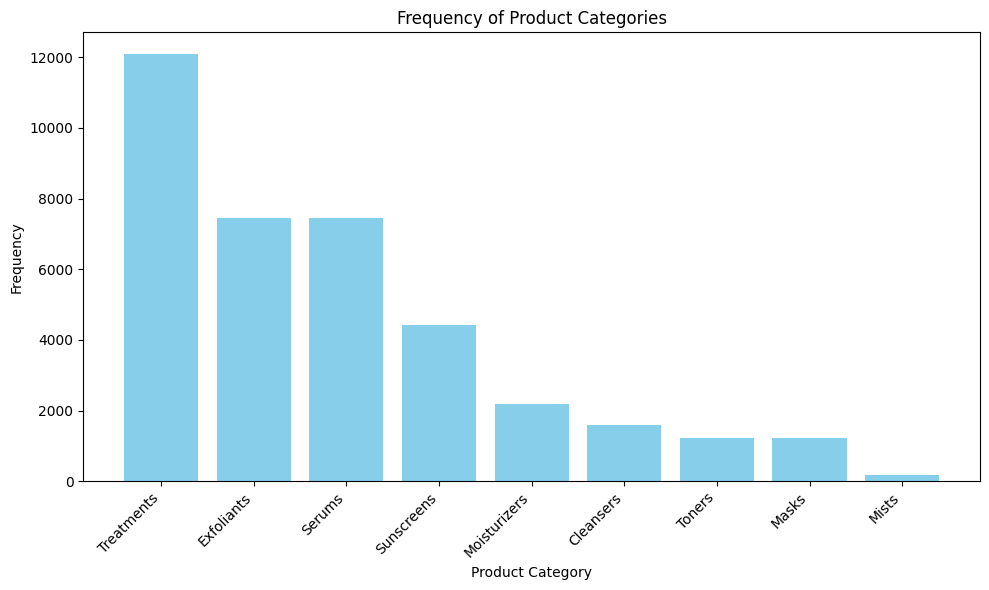

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define product categories and subcategories
product_categories = {
    'Cleansers': [
        'cleanser', 'foam', 'micellar'
    ],
    'Exfoliants': [
        'exfoliant', 'aha', 'bha', 'pha', 'enzyme', 'exfoliating', 'scrub'
    ],
    'Toners': [
        'toner','hydrating', 'essence'
    ],
    'Serums': [
        'serum', 'brightening', 'antioxidant', 'calming'
    ],
    'Moisturizers': [
        'moisturizer', 'lotion', 'ointment', 'hydrating'
    ],
    'Masks': [
        'mask', 'sheet', 'clay', 'peel', 'overnight', 'mud', 'bubble'
    ],
    'Treatments': [
        'treatment', 'spot', 'acne', 'scar', 'retinol', 'peptide', 'dry'
    ],
    'Sunscreens': [
        'sunscreen', 'mineral', 'tinted', 'stick'
    ],
    'Mists': [
        'mist', 'hydrating', 'setting', 'soothing', 'refreshing'
    ]
}



# Initialize an empty list to store the frequency counts
frequency_counts = []

# Iterate through each product category
for category, subcategories in tqdm(product_categories.items(), desc="Processing categories"):
    # Count occurrences of each category and subcategory in the 'lemmatized_tokens' column
    for subcategory in subcategories:
        count = df['lemmatized_tokens'].str.contains(subcategory).sum()
        frequency_counts.append([category, subcategory, count])

# Create a new DataFrame with the frequency counts
df_product_by_function = pd.DataFrame(frequency_counts, columns=['Category', 'Subcategory', 'Frequency'])

# Group by Category and sum the frequencies
df_summary = df_product_by_function.groupby('Category')['Frequency'].sum().reset_index()

# Sort the DataFrame in descending order of Frequency
df_summary = df_summary.sort_values(by='Frequency', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_summary['Category'], df_summary['Frequency'], color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.title('Frequency of Product Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Save the df_product_by_function DataFrame
df_product_by_function.to_csv('df_product_by_function_3.csv', index=False)


#####2. Semantic for each product

Processing categories: 100%|██████████| 9/9 [00:02<00:00,  3.29it/s]


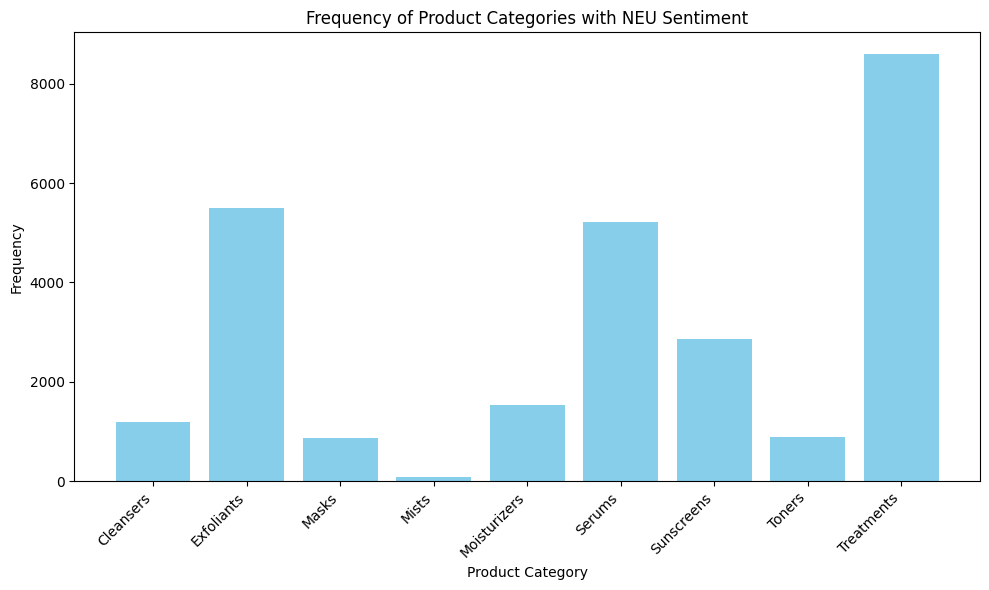

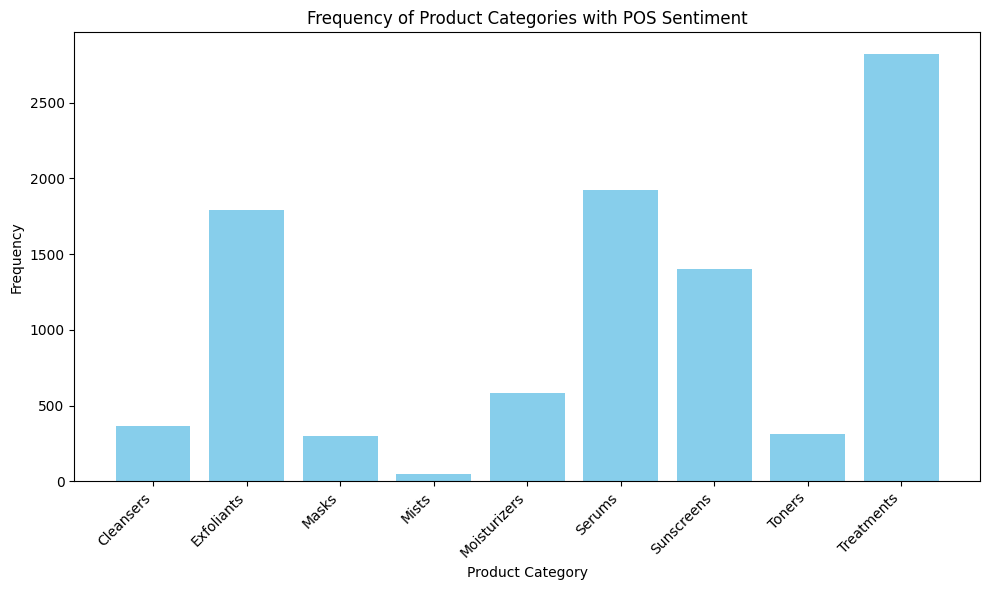

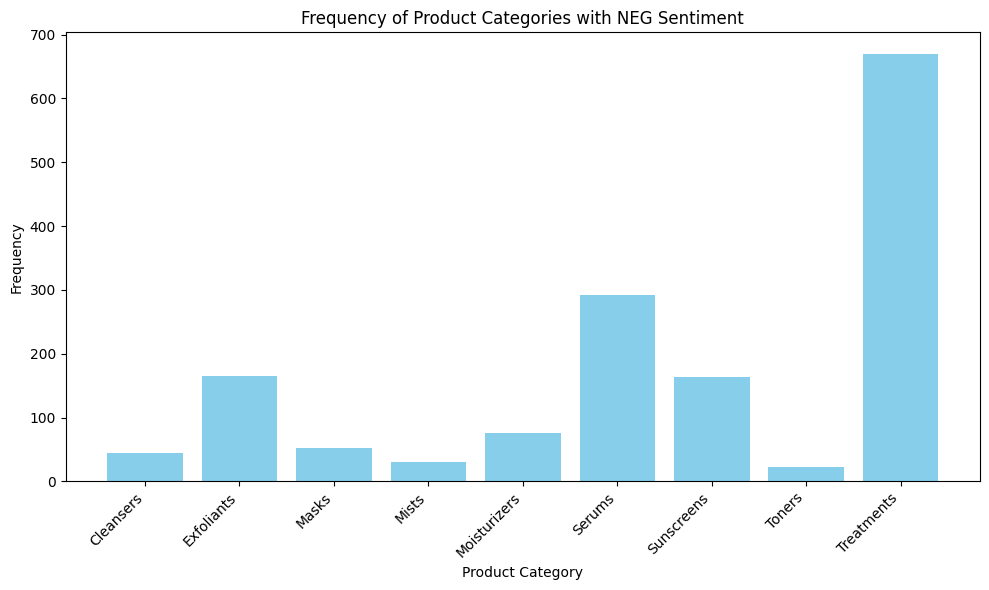

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define product categories and subcategories
product_categories = {
    'Cleansers': ['cleanser', 'foam', 'micellar'],
    'Exfoliants': ['exfoliant', 'aha', 'bha', 'pha', 'enzyme', 'exfoliating', 'scrub'],
    'Toners': ['toner', 'hydrating', 'essence'],
    'Serums': ['serum', 'brightening', 'antioxidant', 'calming'],
    'Moisturizers': ['moisturizer', 'lotion', 'ointment', 'hydrating'],
    'Masks': ['mask', 'sheet', 'clay', 'peel', 'overnight', 'mud', 'bubble'],
    'Treatments': ['treatment', 'spot', 'acne', 'scar', 'retinol', 'peptide', 'dry'],
    'Sunscreens': ['sunscreen', 'mineral', 'tinted', 'stick'],
    'Mists': ['mist', 'hydrating', 'setting', 'soothing', 'refreshing']
}

# Initialize an empty list to store the frequency counts
frequency_counts = []

# Iterate through each product category
for category, subcategories in tqdm(product_categories.items(), desc="Processing categories"):
    # Count occurrences of each category and subcategory in the 'lemmatized_tokens' column and count sentiment labels
    for subcategory in subcategories:
        sub_df = df[df['lemmatized_tokens'].str.contains(subcategory, na=False)]
        sentiment_counts = sub_df['Sentiment Label'].value_counts().to_dict()
        for sentiment, count in sentiment_counts.items():
            frequency_counts.append([category, subcategory, sentiment, count])

# Create a new DataFrame with the frequency counts
df_product_by_function = pd.DataFrame(frequency_counts, columns=['Category', 'Subcategory', 'Sentiment', 'Frequency'])

# Group by Category and sum the frequencies
df_summary = df_product_by_function.groupby(['Category', 'Sentiment'])['Frequency'].sum().reset_index()

# Sort the DataFrame in descending order of Frequency within each Category
df_summary = df_summary.sort_values(by=['Category', 'Frequency'], ascending=[True, False])

# Plotting the bar chart for each sentiment
for sentiment in df_summary['Sentiment'].unique():
    sentiment_data = df_summary[df_summary['Sentiment'] == sentiment]
    plt.figure(figsize=(10, 6))
    plt.bar(sentiment_data['Category'], sentiment_data['Frequency'], color='skyblue')
    plt.xlabel('Product Category')
    plt.ylabel('Frequency')
    plt.title(f'Frequency of Product Categories with {sentiment} Sentiment')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Save the df_product_by_function DataFrame
df_product_by_function.to_csv('df_product_by_function_sentiment_1.csv', index=False)


Processing categories: 100%|██████████| 9/9 [00:02<00:00,  3.46it/s]


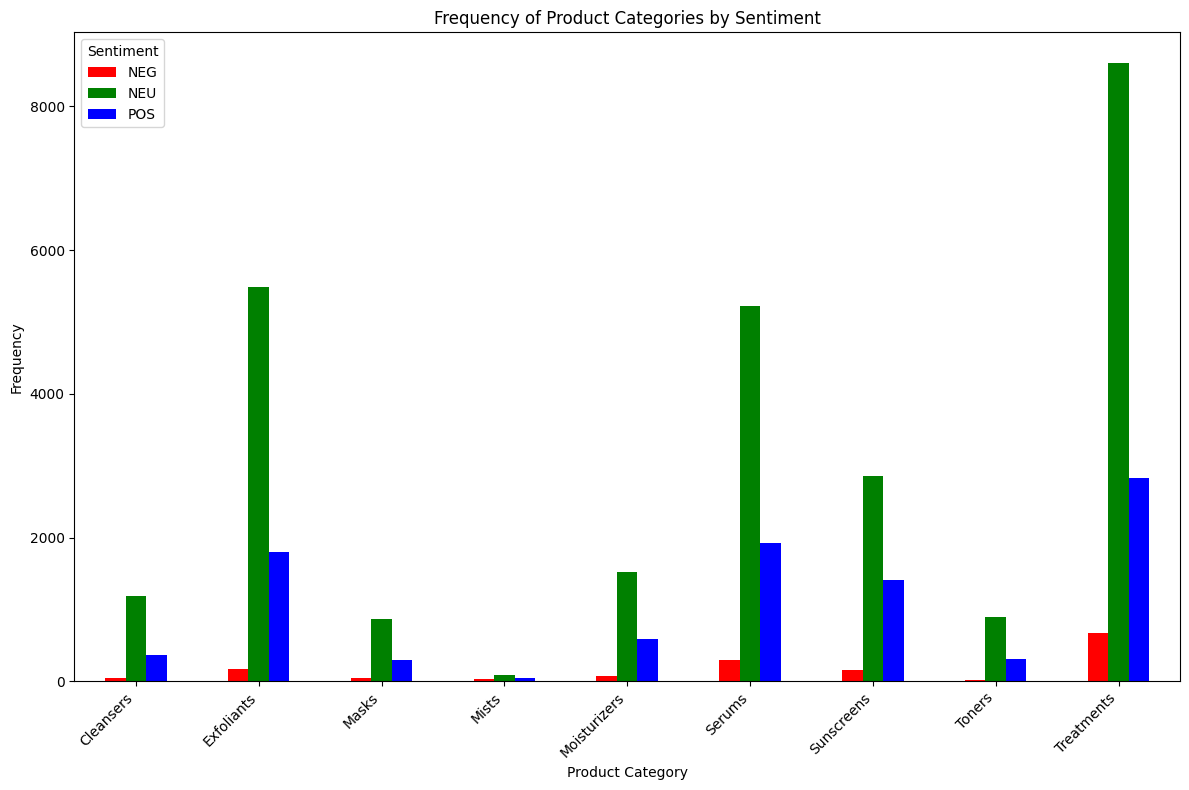

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define product categories and subcategories
product_categories = {
    'Cleansers': ['cleanser', 'foam', 'micellar'],
    'Exfoliants': ['exfoliant', 'aha', 'bha', 'pha', 'enzyme', 'exfoliating', 'scrub'],
    'Toners': ['toner', 'hydrating', 'essence'],
    'Serums': ['serum', 'brightening', 'antioxidant', 'calming'],
    'Moisturizers': ['moisturizer', 'lotion', 'ointment', 'hydrating'],
    'Masks': ['mask', 'sheet', 'clay', 'peel', 'overnight', 'mud', 'bubble'],
    'Treatments': ['treatment', 'spot', 'acne', 'scar', 'retinol', 'peptide', 'dry'],
    'Sunscreens': ['sunscreen', 'mineral', 'tinted', 'stick'],
    'Mists': ['mist', 'hydrating', 'setting', 'soothing', 'refreshing']
}

# Initialize an empty list to store the frequency counts
frequency_counts = []

# Iterate through each product category
for category, subcategories in tqdm(product_categories.items(), desc="Processing categories"):
    # Count occurrences of each category and subcategory in the 'lemmatized_tokens' column and count sentiment labels
    for subcategory in subcategories:
        sub_df = df[df['lemmatized_tokens'].str.contains(subcategory, na=False)]
        sentiment_counts = sub_df['Sentiment Label'].value_counts().to_dict()
        for sentiment, count in sentiment_counts.items():
            frequency_counts.append([category, subcategory, sentiment, count])

# Create a new DataFrame with the frequency counts
df_product_by_function = pd.DataFrame(frequency_counts, columns=['Category', 'Subcategory', 'Sentiment', 'Frequency'])

# Group by Category and Sentiment and sum the frequencies
df_summary = df_product_by_function.groupby(['Category', 'Sentiment'])['Frequency'].sum().reset_index()

# Pivot the data for plotting
df_pivot = df_summary.pivot(index='Category', columns='Sentiment', values='Frequency').fillna(0)

# Plotting the grouped bar chart
df_pivot.plot(kind='bar', figsize=(12, 8), color=['red', 'green', 'blue'])
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.title('Frequency of Product Categories by Sentiment')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

# Save the df_product_by_function DataFrame
df_product_by_function.to_csv('df_product_by_function_sentiment_2.csv', index=False)


Processing categories: 100%|██████████| 9/9 [00:01<00:00,  6.95it/s]


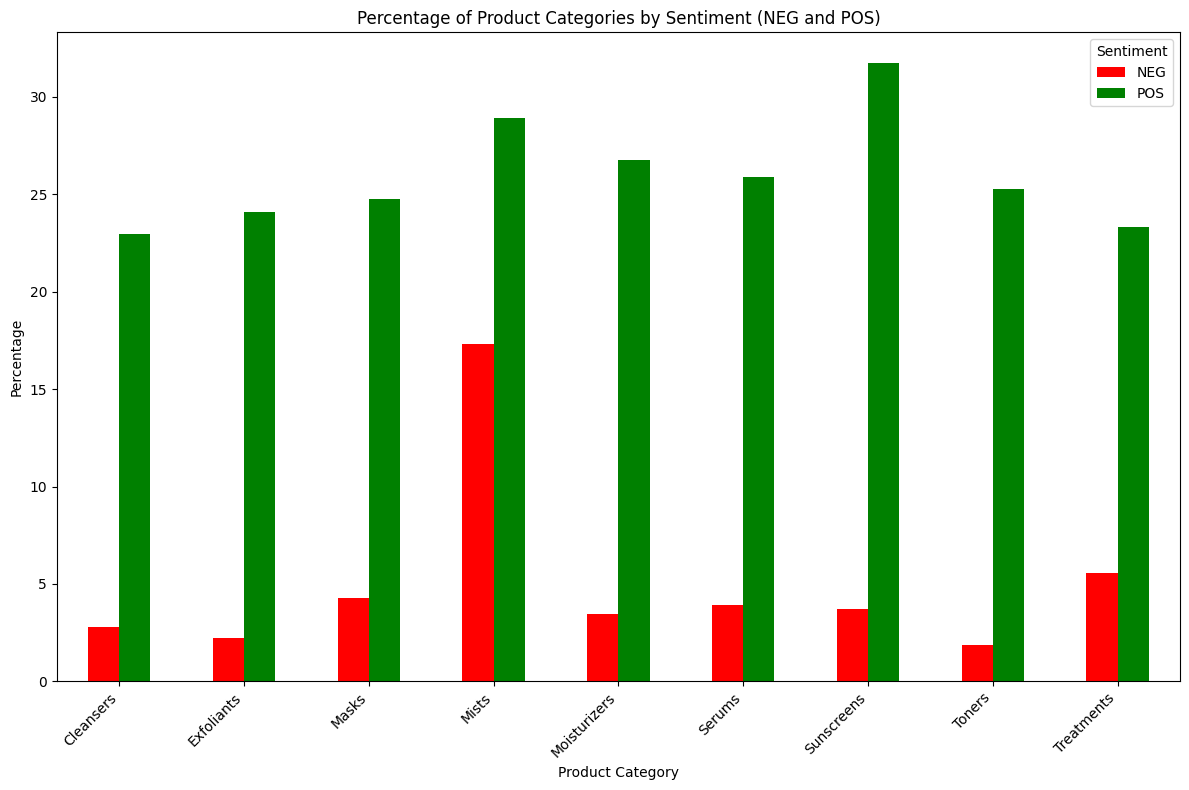

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define product categories and subcategories
product_categories = {
    'Cleansers': ['cleanser', 'foam', 'micellar'],
    'Exfoliants': ['exfoliant', 'aha', 'bha', 'pha', 'enzyme', 'exfoliating', 'scrub'],
    'Toners': ['toner', 'hydrating', 'essence'],
    'Serums': ['serum', 'brightening', 'antioxidant', 'calming'],
    'Moisturizers': ['moisturizer', 'lotion', 'ointment', 'hydrating'],
    'Masks': ['mask', 'sheet', 'clay', 'peel', 'overnight', 'mud', 'bubble'],
    'Treatments': ['treatment', 'spot', 'acne', 'scar', 'retinol', 'peptide', 'dry'],
    'Sunscreens': ['sunscreen', 'mineral', 'tinted', 'stick'],
    'Mists': ['mist', 'hydrating', 'setting', 'soothing', 'refreshing']
}

# Initialize an empty list to store the frequency counts
frequency_counts = []

# Iterate through each product category
for category, subcategories in tqdm(product_categories.items(), desc="Processing categories"):
    # Count occurrences of each category and subcategory in the 'lemmatized_tokens' column and count sentiment labels
    for subcategory in subcategories:
        sub_df = df[df['lemmatized_tokens'].str.contains(subcategory, na=False)]
        sentiment_counts = sub_df['Sentiment Label'].value_counts().to_dict()
        for sentiment, count in sentiment_counts.items():
            frequency_counts.append([category, subcategory, sentiment, count])

# Create a new DataFrame with the frequency counts
df_product_by_function = pd.DataFrame(frequency_counts, columns=['Category', 'Subcategory', 'Sentiment', 'Frequency'])

# Group by Category and Sentiment and sum the frequencies
df_summary = df_product_by_function.groupby(['Category', 'Sentiment'])['Frequency'].sum().reset_index()

# Pivot the data for plotting, including only NEG and POS sentiments
df_pivot = df_summary.pivot(index='Category', columns='Sentiment', values='Frequency').fillna(0)

# Calculate the total frequencies for each category
df_pivot['Total'] = df_pivot.sum(axis=1)

# Calculate the percentage for NEG and POS sentiments
df_pivot['NEG'] = (df_pivot['NEG'] / df_pivot['Total']) * 100
df_pivot['POS'] = (df_pivot['POS'] / df_pivot['Total']) * 100

# Drop the 'Total' column as it is no longer needed for plotting
df_pivot = df_pivot[['NEG', 'POS']]

# Plotting the grouped bar chart
df_pivot.plot(kind='bar', figsize=(12, 8), color=['red', 'green'])
plt.xlabel('Product Category')
plt.ylabel('Percentage')
plt.title('Percentage of Product Categories by Sentiment (NEG and POS)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


#####3. Co-occurrence (Association)

In [20]:
import pandas as pd
from tqdm import tqdm
from collections import Counter
import string

# Define product categories and subcategories
product_categories = {
    'Cleansers': ['cleanser', 'foam', 'micellar'],
    'Exfoliants': ['exfoliant', 'aha', 'bha', 'pha', 'enzyme', 'exfoliating', 'scrub'],
    'Toners': ['toner', 'hydrating', 'essence'],
    'Serums': ['serum', 'brightening', 'antioxidant', 'calming'],
    'Moisturizers': ['moisturizer', 'lotion', 'ointment', 'hydrating'],
    'Masks': ['mask', 'sheet', 'clay', 'peel', 'overnight', 'mud', 'bubble'],
    'Treatments': ['treatment', 'spot', 'acne', 'scar', 'retinol', 'peptide', 'dry'],
    'Sunscreens': ['sunscreen', 'mineral', 'tinted', 'stick'],
    'Mists': ['mist', 'hydrating', 'setting', 'soothing', 'refreshing']
}

# Function to find co-occurrences
def find_cooccurrences(df, keywords):
    cooccurrences = Counter()
    for tokens in df['lemmatized_tokens']:
        for keyword in keywords:
            if keyword in tokens:
                filtered_tokens = [token for token in tokens if token.isalpha()]
                cooccurrences.update(filtered_tokens)
                cooccurrences[keyword] -= 1  # Remove the count of the keyword itself
    return cooccurrences

# Perform co-occurrence analysis
cooccurrence_results = {}

for category, keywords in tqdm(product_categories.items(), desc="Processing categories"):
    cooccurrences = find_cooccurrences(df, keywords)
    top_cooccurrences = cooccurrences.most_common(3)
    cooccurrence_results[category] = top_cooccurrences

# Display the results
cooccurrence_results


Processing categories:   0%|          | 0/9 [00:00<?, ?it/s]

Processing categories: 100%|██████████| 9/9 [00:02<00:00,  4.46it/s]


{'Cleansers': [('e', 16962), ('a', 11876), ('i', 10251)],
 'Exfoliants': [('a', 75741), ('e', 65202), ('i', 52110)],
 'Toners': [('e', 11362), ('a', 8398), ('i', 8175)],
 'Serums': [('e', 69359), ('i', 52010), ('a', 51322)],
 'Moisturizers': [('e', 19319), ('i', 16990), ('a', 14031)],
 'Masks': [('e', 11807), ('a', 10566), ('i', 7387)],
 'Treatments': [('e', 117558), ('a', 89331), ('i', 81088)],
 'Sunscreens': [('e', 38642), ('s', 26266), ('n', 25494)],
 'Mists': [('e', 1404), ('a', 1095), ('i', 987)]}

In [21]:
import pandas as pd
from tqdm import tqdm
from collections import Counter

# Define product categories and subcategories
product_categories = {
    'Cleansers': ['cleanser', 'foam', 'micellar'],
    'Exfoliants': ['exfoliant', 'aha', 'bha', 'pha', 'enzyme', 'exfoliating', 'scrub'],
    'Toners': ['toner', 'hydrating', 'essence'],
    'Serums': ['serum', 'brightening', 'antioxidant', 'calming'],
    'Moisturizers': ['moisturizer', 'lotion', 'ointment', 'hydrating'],
    'Masks': ['mask', 'sheet', 'clay', 'peel', 'overnight', 'mud', 'bubble'],
    'Treatments': ['treatment', 'spot', 'acne', 'scar', 'retinol', 'peptide', 'dry'],
    'Sunscreens': ['sunscreen', 'mineral', 'tinted', 'stick'],
    'Mists': ['mist', 'hydrating', 'setting', 'soothing', 'refreshing']
}

# Function to find co-occurrences
def find_cooccurrences(df, keywords):
    cooccurrences = Counter()
    for tokens in df['lemmatized_tokens']:
        tokens_list = eval(tokens)  # Convert string representation of list back to list
        for keyword in keywords:
            if keyword in tokens_list:
                filtered_tokens = [token for token in tokens_list if token.isalpha() and token != keyword]
                cooccurrences.update(filtered_tokens)
    return cooccurrences

# Perform co-occurrence analysis
cooccurrence_results = {}

for category, keywords in tqdm(product_categories.items(), desc="Processing categories"):
    cooccurrences = find_cooccurrences(df, keywords)
    top_cooccurrences = cooccurrences.most_common(3)
    cooccurrence_results[category] = top_cooccurrences

# Display the results in the desired format
formatted_results = {}
for category, cooccurrences in cooccurrence_results.items():
    formatted_results[category] = [[item[0], item[1]] for item in cooccurrences]

formatted_results


Processing categories: 100%|██████████| 9/9 [00:16<00:00,  1.81s/it]


{'Cleansers': [['use', 597], ['skin', 551], ['solution', 379]],
 'Exfoliants': [['use', 1824], ['skin', 1175], ['acid', 1152]],
 'Toners': [['use', 746], ['skin', 384], ['acid', 381]],
 'Serums': [['use', 3991], ['skin', 2438], ['acid', 1910]],
 'Moisturizers': [['use', 1030], ['skin', 806], ['body', 463]],
 'Masks': [['use', 585], ['aha', 352], ['bha', 318]],
 'Treatments': [['skin', 6479], ['use', 5290], ['serum', 3064]],
 'Sunscreens': [['please', 824], ['use', 807], ['hey', 802]],
 'Mists': [['skin', 20], ['toner', 12], ['love', 11]]}

#####4. TF-IDF

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm

# Define product categories and subcategories
product_categories = {
    'Cleansers': ['cleanser', 'foam', 'micellar'],
    'Exfoliants': ['exfoliant', 'aha', 'bha', 'pha', 'enzyme', 'exfoliating', 'scrub'],
    'Toners': ['toner', 'hydrating', 'essence'],
    'Serums': ['serum', 'brightening', 'antioxidant', 'calming'],
    'Moisturizers': ['moisturizer', 'lotion', 'ointment', 'hydrating'],
    'Masks': ['mask', 'sheet', 'clay', 'peel', 'overnight', 'mud', 'bubble'],
    'Treatments': ['treatment', 'spot', 'acne', 'scar', 'retinol', 'peptide', 'dry'],
    'Sunscreens': ['sunscreen', 'mineral', 'tinted', 'stick'],
    'Mists': ['mist', 'hydrating', 'setting', 'soothing', 'refreshing']
}

# Function to categorize the tokens
def categorize_tokens(tokens):
    categories = []
    for category, subcategories in product_categories.items():
        if any(subcategory in tokens for subcategory in subcategories):
            categories.append(category)
    return categories

# Apply the categorize_tokens function to each row in the 'lemmatized_tokens' column
df['product_categories'] = df['lemmatized_tokens'].apply(categorize_tokens)

# Function to calculate and print top 5 TF-IDF scores for a given category
def print_top_tfidf_scores(category):
    # Filter the DataFrame for rows that contain the given category
    category_df = df[df['product_categories'].apply(lambda x: category in x)]
    
    # Join the lemmatized tokens for TF-IDF calculation
    documents = category_df['lemmatized_tokens'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) else ' '.join(x))
    
    if len(documents) > 0:
        # Initialize a TF-IDF vectorizer
        tfidf_vectorizer = TfidfVectorizer()
        
        # Fit the TF-IDF vectorizer and transform the documents
        tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
        
        # Get the feature names (terms)
        feature_names = tfidf_vectorizer.get_feature_names_out()
        
        # Calculate the average TF-IDF score for each term
        tfidf_scores = tfidf_matrix.mean(axis=0).A1
        tfidf_scores = dict(zip(feature_names, tfidf_scores))
        
        # Sort the terms by their TF-IDF score in descending order and get the top 5
        sorted_terms = sorted(tfidf_scores.items(), key=lambda item: item[1], reverse=True)[:5]
        top_terms = [term for term, score in sorted_terms]
        
        # Print the top 5 terms for the category
        print(f"{category}: {top_terms}")
    else:
        print(f"{category}: No data available")

# Calculate and print top 5 TF-IDF scores for each category with a progress bar
for category in tqdm(product_categories.keys(), desc="Calculating TF-IDF"):
    print_top_tfidf_scores(category)

# Save the updated DataFrame with product categories
df.to_csv('df_with_product_categories.csv', index=False)


Calculating TF-IDF:  22%|██▏       | 2/9 [00:00<00:01,  6.54it/s]

Cleansers: ['cleanser', 'use', 'skin', 'solution', 'salicylic']
Exfoliants: ['use', 'alpha', 'arbutin', 'acid', 'serum']
Toners: ['toner', 'use', 'acid', 'skin', 'serum']


Calculating TF-IDF:  67%|██████▋   | 6/9 [00:00<00:00,  8.60it/s]

Serums: ['serum', 'use', 'skin', 'acid', 'niacinamide']
Moisturizers: ['moisturizer', 'use', 'skin', 'body', 'lotion']
Masks: ['use', 'peel', 'aha', 'mask', 'bha']


Calculating TF-IDF: 100%|██████████| 9/9 [00:01<00:00,  7.19it/s]

Treatments: ['acne', 'skin', 'use', 'serum', 'retinol']
Sunscreens: ['sunscreen', 'please', 'stick', 'use', 'hey']
Mists: ['mist', 'product', 'skin', 'available', 'hey']


In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm

# Define product categories and subcategories
product_categories = {
    'Cleansers': ['cleanser', 'foam', 'micellar'],
    'Exfoliants': ['exfoliant', 'aha', 'bha', 'pha', 'enzyme', 'exfoliating', 'scrub'],
    'Toners': ['toner', 'hydrating', 'essence'],
    'Serums': ['serum', 'brightening', 'antioxidant', 'calming'],
    'Moisturizers': ['moisturizer', 'lotion', 'ointment', 'hydrating'],
    'Masks': ['mask', 'sheet', 'clay', 'peel', 'overnight', 'mud', 'bubble'],
    'Treatments': ['treatment', 'spot', 'acne', 'scar', 'retinol', 'peptide', 'dry'],
    'Sunscreens': ['sunscreen', 'mineral', 'tinted', 'stick'],
    'Mists': ['mist', 'hydrating', 'setting', 'soothing', 'refreshing']
}

# Function to categorize the tokens
def categorize_tokens(tokens):
    categories = []
    for category, subcategories in product_categories.items():
        if any(subcategory in tokens for subcategory in subcategories):
            categories.append(category)
    return categories

# Apply the categorize_tokens function to each row in the 'lemmatized_tokens' column
df['product_categories'] = df['lemmatized_tokens'].apply(categorize_tokens)

# Function to calculate and print top 10 TF-IDF scores for a given category
def print_top_tfidf_scores(category):
    # Filter the DataFrame for rows that contain the given category
    category_df = df[df['product_categories'].apply(lambda x: category in x)]
    
    # Join the lemmatized tokens for TF-IDF calculation
    documents = category_df['lemmatized_tokens'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) else ' '.join(x))
    
    if len(documents) > 0:
        # Initialize a TF-IDF vectorizer
        tfidf_vectorizer = TfidfVectorizer()
        
        # Fit the TF-IDF vectorizer and transform the documents
        tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
        
        # Get the feature names (terms)
        feature_names = tfidf_vectorizer.get_feature_names_out()
        
        # Calculate the average TF-IDF score for each term
        tfidf_scores = tfidf_matrix.mean(axis=0).A1
        tfidf_scores = dict(zip(feature_names, tfidf_scores))
        
        # Sort the terms by their TF-IDF score in descending order and get the top 10
        sorted_terms = sorted(tfidf_scores.items(), key=lambda item: item[1], reverse=True)
        top_terms = [(term, round(score, 2)) for term, score in sorted_terms if term not in product_categories[category]][:10]
        
        # Print the top 10 terms with their TF-IDF scores for the category
        print(f"{category}: {top_terms}")
    else:
        print(f"{category}: No data available")


# Calculate and print top 10 TF-IDF scores for each category with a progress bar
for category in tqdm(product_categories.keys(), desc="Calculating TF-IDF"):
    print_top_tfidf_scores(category)

# Save the updated DataFrame with product categories
df.to_csv('df_with_product_categories.csv', index=False)


Calculating TF-IDF:   0%|          | 0/9 [00:00<?, ?it/s]

Cleansers: [('use', 0.06), ('skin', 0.05), ('solution', 0.04), ('salicylic', 0.04), ('serum', 0.03), ('acne', 0.03), ('eucerin', 0.03), ('acid', 0.03), ('hey', 0.03), ('pore', 0.03)]


Calculating TF-IDF:  22%|██▏       | 2/9 [00:00<00:01,  5.60it/s]

Exfoliants: [('use', 0.05), ('alpha', 0.05), ('arbutin', 0.05), ('acid', 0.03), ('serum', 0.03), ('skin', 0.03), ('hey', 0.03), ('matahari', 0.02), ('skinhealth', 0.02), ('cetaphil5soss', 0.02)]
Toners: [('use', 0.08), ('acid', 0.05), ('skin', 0.05), ('serum', 0.04), ('pha', 0.04), ('beminimalist', 0.03), ('please', 0.03), ('niacinamide', 0.03), ('hey', 0.03), ('salicylic', 0.02)]


Calculating TF-IDF:  56%|█████▌    | 5/9 [00:00<00:00,  5.75it/s]

Serums: [('use', 0.06), ('skin', 0.04), ('acid', 0.04), ('niacinamide', 0.03), ('vitamin', 0.03), ('acne', 0.03), ('salicylic', 0.03), ('beminimalist', 0.03), ('please', 0.02), ('hey', 0.02)]
Moisturizers: [('use', 0.06), ('skin', 0.04), ('body', 0.04), ('serum', 0.03), ('acid', 0.03), ('hey', 0.03), ('apply', 0.03), ('please', 0.03), ('vitamin', 0.02), ('product', 0.02)]
Masks: [('use', 0.06), ('aha', 0.04), ('bha', 0.04), ('skin', 0.03), ('acid', 0.03), ('serum', 0.03), ('hair', 0.03), ('hey', 0.03), ('pha', 0.03), ('beminimalist', 0.02)]


Calculating TF-IDF: 100%|██████████| 9/9 [00:01<00:00,  6.05it/s]

Treatments: [('skin', 0.06), ('use', 0.05), ('serum', 0.04), ('acid', 0.03), ('product', 0.03), ('please', 0.03), ('hey', 0.03), ('beminimalist', 0.02), ('help', 0.02), ('niacinamide', 0.02)]
Sunscreens: [('please', 0.04), ('use', 0.03), ('hey', 0.03), ('skin', 0.03), ('launch', 0.03), ('beminimalist', 0.03), ('spf', 0.02), ('wait', 0.02), ('product', 0.02), ('soon', 0.02)]
Mists: [('product', 0.03), ('skin', 0.03), ('available', 0.03), ('hey', 0.03), ('mistake', 0.03), ('please', 0.03), ('use', 0.03), ('order', 0.03), ('face', 0.02), ('toner', 0.02)]


###*8.1.2 By Target Area (Face, Body, Hands and Feet, Lips)*

#####1. Frequency of the each area

#####2. Co-occurrence (Association)

###*8.1.3 By Ingredient Type (Natural and Organic, Chemical-Based, Halal, Vegan, Fragrance-Free, Alcohol-Free)*

#####1. Frequency of Ingredient Type

#####2. Semantic for each Ingredient Type

#####3. Co-occurrence (Association)

##**8.2 Branding & Customer Service**

###*8.2.1 Feedback*

###*8.2.2 Policies*

#####1. Frequency of the Policy-related words

Processing categories: 100%|██████████| 4/4 [00:00<00:00, 11.37it/s]


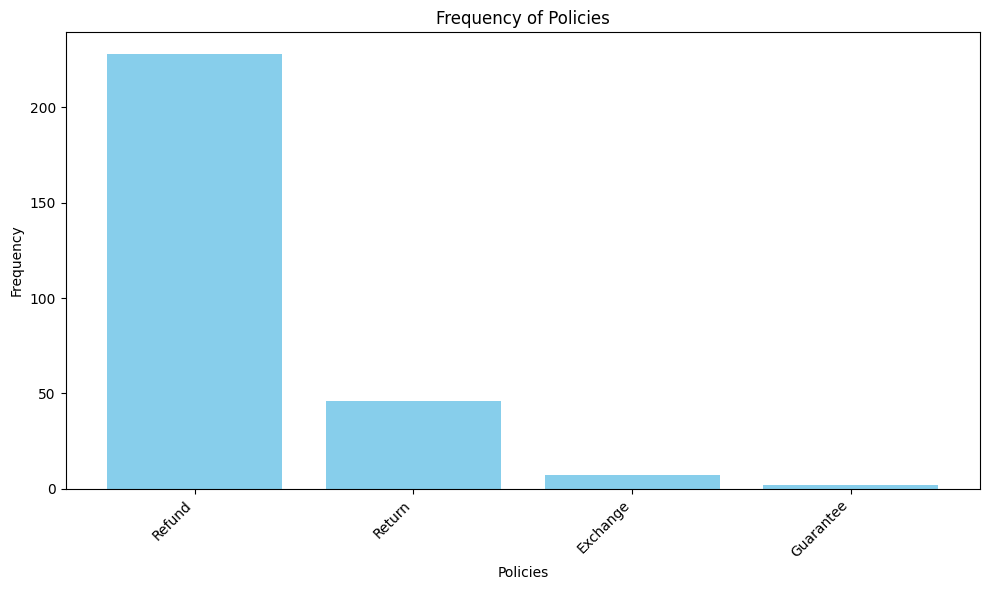

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define product categories and subcategories
policy_keywords = {
    'Return': ['return', 'return policy', 'restoration', 'regaining', 'income_tax_return', 'give', 'turn_back', 'take_back', 'rejoin', 'give_back', 'recurrence', 'riposte', 'come_back', 'pass', 'revert', 'return_key', 'bring_back', 'retort', 'reelect', 'restitution', 'regress', 'recall', 'retrovert', 'tax_return'],
    'Refund': ['refund', 'refund policy', 'money back', 'repay', 'repayment', 'back','paying_back', 'payoff'],
    'Exchange': ['exchange', 'exchange policy', 'commutation', 'rally', 'substitution', 'interchange', 'change', 'replace', 'switch', 'substitute', 'switch_over', 'telephone_exchange', 'convert'],
    'Guarantee': ['guarantee', 'warranty', 'warrantee', 'ensure', 'assure', 'secure', 'insure', 'undertake', 'warrant', 'guaranty', 'vouch']
}

# Initialize an empty list to store the frequency counts
frequency_counts = []

# Iterate through each product category
for category, subcategories in tqdm(policy_keywords.items(), desc="Processing categories"):
    # Count occurrences of each category and subcategory in the 'lemmatized_tokens' column
    for subcategory in subcategories:
        count = df['lemmatized_tokens'].str.contains(subcategory).sum()
        frequency_counts.append([category, subcategory, count])

# Create a new DataFrame with the frequency counts
df_product_by_function = pd.DataFrame(frequency_counts, columns=['Keywords', 'Sub-keywords', 'Frequency'])

# Group by Category and sum the frequencies
df_summary = df_product_by_function.groupby('Keywords')['Frequency'].sum().reset_index()

# Sort the DataFrame in descending order of Frequency
df_summary = df_summary.sort_values(by='Frequency', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_summary['Keywords'], df_summary['Frequency'], color='skyblue')
plt.xlabel('Policies')
plt.ylabel('Frequency')
plt.title('Frequency of Policies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Save the df_product_by_function DataFrame
df_product_by_function.to_csv('df_policies_by_frequency.csv', index=False)


In [32]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Chummy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Chummy\AppData\Roaming\nltk_data...


True

In [34]:
from nltk.corpus import wordnet

def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.add(lemma.name())
    return synonyms

# List of words to find synonyms for
words = ['return', 'refund', 'exchange', 'guarantee']

# Find and print synonyms for each word
for word in words:
    synonyms = get_synonyms(word)
    print(f"Synonyms for '{word}': {synonyms}")


Synonyms for 'return': {'paying_back', 'restoration', 'render', 'regaining', 'homecoming', 'comeback', 'income_tax_return', 'give', 'turn_back', 'take_back', 'rejoin', 'return', 'give_back', 'deliver', 'recurrence', 'riposte', 'payoff', 'generate', 'come_back', 'pass', 'rejoinder', 'proceeds', 'revert', 'return_key', 'issue', 'bring_back', 'replication', 'devolve', 'counter', 'hark_back', 'reappearance', 'yield', 'takings', 'retort', 'refund', 'reelect', 'restitution', 'take', 'repay', 'getting_even', 'regress', 'recall', 'retrovert', 'coming_back', 'fall', 'tax_return'}
Synonyms for 'refund': {'give_back', 'repay', 'repayment', 'refund', 'return'}
Synonyms for 'exchange': {'commutation', 'exchange', 'rally', 'commute', 'substitution', 'interchange', 'change', 'replace', 'switch', 'substitute', 'central', 'switch_over', 'telephone_exchange', 'convert'}
Synonyms for 'guarantee': {'guarantee', 'warrantee', 'ensure', 'assure', 'secure', 'insure', 'warranty', 'undertake', 'warrant', 'guara

Processing categories: 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]


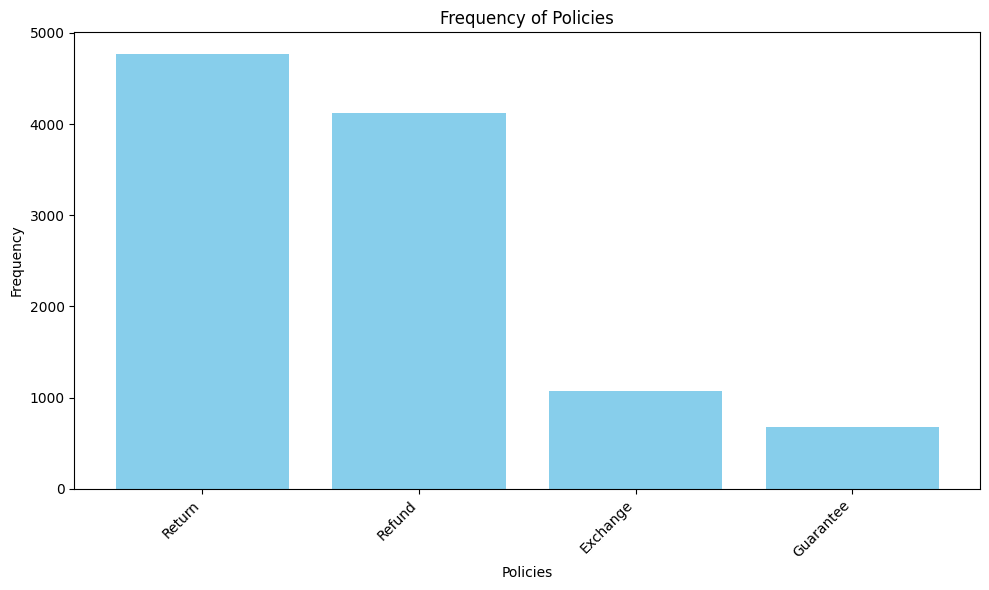

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define product categories and subcategories
policy_keywords = {
    'Return': ['return', 'return policy', 'restoration', 'regaining', 'income_tax_return', 'give', 'turn_back', 'take_back', 'rejoin', 'give_back', 'recurrence', 'riposte', 'come_back', 'pass', 'revert', 'return_key', 'bring_back', 'retort', 'reelect', 'restitution', 'regress', 'recall', 'retrovert', 'tax_return'],
    'Refund': ['refund', 'refund policy', 'money back', 'repay', 'repayment', 'back','paying_back', 'payoff'],
    'Exchange': ['exchange', 'exchange policy', 'commutation', 'rally', 'substitution', 'interchange', 'change', 'replace', 'switch', 'substitute', 'switch_over', 'telephone_exchange', 'convert'],
    'Guarantee': ['guarantee', 'warranty', 'warrantee', 'ensure', 'assure', 'secure', 'insure', 'undertake', 'warrant', 'guaranty', 'vouch']
}

# Initialize an empty list to store the frequency counts
frequency_counts = []

# Iterate through each product category
for category, subcategories in tqdm(policy_keywords.items(), desc="Processing categories"):
    # Count occurrences of each category and subcategory in the 'lemmatized_tokens' column
    for subcategory in subcategories:
        count = df['lemmatized_tokens'].str.contains(subcategory).sum()
        frequency_counts.append([category, subcategory, count])

# Create a new DataFrame with the frequency counts
df_product_by_function = pd.DataFrame(frequency_counts, columns=['Keywords', 'Sub-keywords', 'Frequency'])

# Group by Category and sum the frequencies
df_summary = df_product_by_function.groupby('Keywords')['Frequency'].sum().reset_index()

# Sort the DataFrame in descending order of Frequency
df_summary = df_summary.sort_values(by='Frequency', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_summary['Keywords'], df_summary['Frequency'], color='skyblue')
plt.xlabel('Policies')
plt.ylabel('Frequency')
plt.title('Frequency of Policies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Save the df_product_by_function DataFrame
df_product_by_function.to_csv('df_policies_by_frequency_2.csv', index=False)


Processing categories: 100%|██████████| 4/4 [00:00<00:00,  4.34it/s]


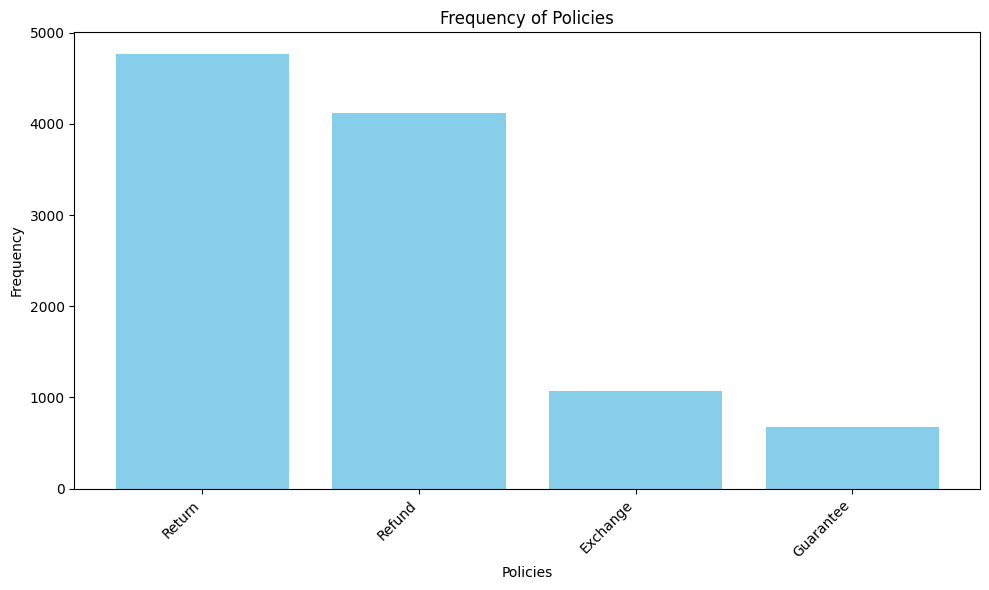

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define product categories and subcategories
policy_keywords = {
    'Return': ['return', 'give', 'pass', 'revert'],
    'Refund': ['refund', 'repay', 'back'],
    'Exchange': ['exchange', 'rally', 'change', 'replace', 'switch', 'substitute', 'convert'],
    'Guarantee': ['guarantee', 'ensure', 'assure', 'secure', 'vouch']
}

# Initialize an empty list to store the frequency counts
frequency_counts = []

# Iterate through each product category
for category, subcategories in tqdm(policy_keywords.items(), desc="Processing categories"):
    # Count occurrences of each category and subcategory in the 'lemmatized_tokens' column
    for subcategory in subcategories:
        count = df['lemmatized_tokens'].str.contains(subcategory).sum()
        frequency_counts.append([category, subcategory, count])

# Create a new DataFrame with the frequency counts
df_product_by_function = pd.DataFrame(frequency_counts, columns=['Keywords', 'Sub-keywords', 'Frequency'])

# Group by Category and sum the frequencies
df_summary = df_product_by_function.groupby('Keywords')['Frequency'].sum().reset_index()

# Sort the DataFrame in descending order of Frequency
df_summary = df_summary.sort_values(by='Frequency', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_summary['Keywords'], df_summary['Frequency'], color='skyblue')
plt.xlabel('Policies')
plt.ylabel('Frequency')
plt.title('Frequency of Policies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Save the df_product_by_function DataFrame
df_product_by_function.to_csv('df_policies_by_frequency_3.csv', index=False)


#####2. Semantic of the Policy-related words

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define product categories and subcategories
policy_keywords = {
    'Return': ['return', 'give', 'pass', 'revert'],
    'Refund': ['refund', 'repay', 'back'],
    'Exchange': ['exchange', 'rally', 'change', 'replace', 'switch', 'substitute', 'convert'],
    'Guarantee': ['guarantee', 'ensure', 'assure', 'secure', 'vouch']
}

# Initialize an empty list to store the frequency counts
frequency_counts = []

# Iterate through each product category
for keywords, subkeywords in tqdm(policy_keywords.items(), desc="Policy keywords"):
    # Count occurrences of each category and subcategory in the 'lemmatized_tokens' column and count sentiment labels
    for subkeyword in subkeywords:
        sub_df = df[df['lemmatized_tokens'].str.contains(subkeyword, na=False)]
        sentiment_counts = sub_df['Sentiment Label'].value_counts().to_dict()
        for sentiment, count in sentiment_counts.items():
            frequency_counts.append([keywords, subkeyword, sentiment, count])

# Create a new DataFrame with the frequency counts
df_product_by_function = pd.DataFrame(frequency_counts, columns=['Keyword', 'Subkeyword', 'Sentiment', 'Frequency'])

# Group by Category and Sentiment and sum the frequencies
df_summary = df_product_by_function.groupby(['Category', 'Sentiment'])['Frequency'].sum().reset_index()

# Pivot the data for plotting
df_pivot = df_summary.pivot(index='Category', columns='Sentiment', values='Frequency').fillna(0)

# Plotting the grouped bar chart
df_pivot.plot(kind='bar', figsize=(12, 8), color=['red', 'green', 'blue'])
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.title('Frequency of Product Categories by Sentiment')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

# Save the df_product_by_function DataFrame
df_product_by_function.to_csv('df_product_by_function_sentiment_2.csv', index=False)

#####3. Reason for return/refund

Finding the co-occurence of words related to the policy-related keywords

In [15]:
import pandas as pd
from tqdm import tqdm
from collections import Counter

# Define policy categories and subcategories

policy_keywords = {
    'Return': ['return', 'give', 'pass', 'revert'],
    'Refund': ['refund', 'repay', 'back'],
    'Exchange': ['exchange', 'rally', 'change', 'replace', 'switch', 'substitute', 'convert'],
    'Guarantee': ['guarantee', 'ensure', 'assure', 'secure', 'vouch']
}

# Function to find co-occurrences
def find_cooccurrences(df, keywords):
    cooccurrences = Counter()
    for tokens in df['lemmatized_tokens']:
        tokens_list = eval(tokens)  # Convert string representation of list back to list
        for keyword in keywords:
            if keyword in tokens_list:
                filtered_tokens = [token for token in tokens_list if token.isalpha() and token != keyword]
                cooccurrences.update(filtered_tokens)
    return cooccurrences

# Perform co-occurrence analysis
cooccurrence_results = {}

for category, keywords in tqdm(policy_keywords.items(), desc="Policy keywords"):
    cooccurrences = find_cooccurrences(df, keywords)
    top_cooccurrences = cooccurrences.most_common(10)
    cooccurrence_results[category] = top_cooccurrences

# Display the results in the desired format
formatted_results = {}
for category, cooccurrences in cooccurrence_results.items():
    formatted_results[category] = [[item[0], item[1]] for item in cooccurrences]

formatted_results


Policy keywords: 100%|██████████| 4/4 [00:13<00:00,  3.25s/it]


{'Return': [['hey', 2825],
  ['dm', 2351],
  ['please', 1915],
  ['check', 1803],
  ['back', 1365],
  ['we', 1354],
  ['delay', 1243],
  ['response', 1158],
  ['team', 1129],
  ['information', 1079]],
 'Refund': [['please', 1840],
  ['check', 1655],
  ['hey', 1645],
  ['revert', 1336],
  ['dm', 1330],
  ['we', 750],
  ['help', 709],
  ['team', 656],
  ['respond', 626],
  ['require', 615]],
 'Exchange': [['use', 345],
  ['skin', 281],
  ['product', 231],
  ['acid', 173],
  ['serum', 159],
  ['hey', 148],
  ['please', 137],
  ['beminimalist', 110],
  ['niacinamide', 109],
  ['retinol', 109]],
 'Guarantee': [['please', 545],
  ['hey', 365],
  ['help', 222],
  ['we', 221],
  ['dm', 205],
  ['team', 187],
  ['sorry', 182],
  ['detail', 171],
  ['understand', 170],
  ['hear', 166]]}

Calculate the TF-IDF for words

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm

# Define policy categories and subcategories

policy_keywords = {
    'Return': ['return', 'give', 'pass', 'revert'],
    'Refund': ['refund', 'repay', 'back'],
    'Exchange': ['exchange', 'rally', 'change', 'replace', 'switch', 'substitute', 'convert'],
    'Guarantee': ['guarantee', 'ensure', 'assure', 'secure', 'vouch']
}

# Function to categorize the tokens
def categorize_tokens(tokens):
    categories = []
    for category, subcategories in policy_keywords.items():
        if any(subcategory in tokens for subcategory in subcategories):
            categories.append(category)
    return categories

# Apply the categorize_tokens function to each row in the 'lemmatized_tokens' column
df['policy_keywords'] = df['lemmatized_tokens'].apply(categorize_tokens)

# Function to calculate and print top 5 TF-IDF scores for a given category
def print_top_tfidf_scores(category):
    # Filter the DataFrame for rows that contain the given category
    category_df = df[df['policy_keywords'].apply(lambda x: category in x)]
    
    # Join the lemmatized tokens for TF-IDF calculation
    documents = category_df['lemmatized_tokens'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) else ' '.join(x))
    
    if len(documents) > 0:
        # Initialize a TF-IDF vectorizer
        tfidf_vectorizer = TfidfVectorizer()
        
        # Fit the TF-IDF vectorizer and transform the documents
        tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
        
        # Get the feature names (terms)
        feature_names = tfidf_vectorizer.get_feature_names_out()
        
        # Calculate the average TF-IDF score for each term
        tfidf_scores = tfidf_matrix.mean(axis=0).A1
        tfidf_scores = dict(zip(feature_names, tfidf_scores))
        
        # Sort the terms by their TF-IDF score in descending order and get the top 5
        sorted_terms = sorted(tfidf_scores.items(), key=lambda item: item[1], reverse=True)[:5]
        top_terms = [term for term, score in sorted_terms]
        
        # Print the top 5 terms for the category
        print(f"{category}: {top_terms}")
    else:
        print(f"{category}: No data available")

# Calculate and print top 5 TF-IDF scores for each category with a progress bar
for category in tqdm(policy_keywords.keys(), desc="Calculating TF-IDF"):
    print_top_tfidf_scores(category)

# Save the updated DataFrame with product categories
df.to_csv('df_with_policy_keywords.csv', index=False)


Calculating TF-IDF:  25%|██▌       | 1/4 [00:00<00:01,  1.52it/s]

Return: ['revert', 'hey', 'dm', 'check', 'please']


Calculating TF-IDF:  75%|███████▌  | 3/4 [00:01<00:00,  2.52it/s]

Refund: ['back', 'please', 'hey', 'check', 'revert']
Exchange: ['change', 'use', 'product', 'skin', 'acid']


Calculating TF-IDF: 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]


Guarantee: ['please', 'assure', 'hey', 'team', 'help']


In [17]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm

# Define product categories and subcategories

policy_keywords = {
    'Return': ['return', 'give', 'pass', 'revert'],
    'Refund': ['refund', 'repay', 'back'],
    'Exchange': ['exchange', 'rally', 'change', 'replace', 'switch', 'substitute', 'convert'],
    'Guarantee': ['guarantee', 'ensure', 'assure', 'secure', 'vouch']
}

# Function to categorize the tokens
def categorize_tokens(tokens):
    categories = []
    for category, subcategories in policy_keywords.items():
        if any(subcategory in tokens for subcategory in subcategories):
            categories.append(category)
    return categories

# Apply the categorize_tokens function to each row in the 'lemmatized_tokens' column
df['policy_keywords'] = df['lemmatized_tokens'].apply(categorize_tokens)

# Function to calculate and print top 10 TF-IDF scores for a given category
def print_top_tfidf_scores(category):
    # Filter the DataFrame for rows that contain the given category
    category_df = df[df['policy_keywords'].apply(lambda x: category in x)]
    
    # Join the lemmatized tokens for TF-IDF calculation
    documents = category_df['lemmatized_tokens'].apply(lambda x: ' '.join(eval(x)) if isinstance(x, str) else ' '.join(x))
    
    if len(documents) > 0:
        # Initialize a TF-IDF vectorizer
        tfidf_vectorizer = TfidfVectorizer()
        
        # Fit the TF-IDF vectorizer and transform the documents
        tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
        
        # Get the feature names (terms)
        feature_names = tfidf_vectorizer.get_feature_names_out()
        
        # Calculate the average TF-IDF score for each term
        tfidf_scores = tfidf_matrix.mean(axis=0).A1
        tfidf_scores = dict(zip(feature_names, tfidf_scores))
        
        # Sort the terms by their TF-IDF score in descending order and get the top 10
        sorted_terms = sorted(tfidf_scores.items(), key=lambda item: item[1], reverse=True)
        top_terms = [(term, round(score, 2)) for term, score in sorted_terms if term not in policy_keywords[category]][:10]
        
        # Print the top 10 terms with their TF-IDF scores for the category
        print(f"{category}: {top_terms}")
    else:
        print(f"{category}: No data available")


# Calculate and print top 10 TF-IDF scores for each category with a progress bar
for category in tqdm(policy_keywords.keys(), desc="Calculating TF-IDF"):
    print_top_tfidf_scores(category)

# Save the updated DataFrame with product categories
df.to_csv('df_with_policy_keywords.csv', index=False)


Calculating TF-IDF:  25%|██▌       | 1/4 [00:00<00:01,  2.20it/s]

Return: [('hey', 0.07), ('dm', 0.07), ('check', 0.07), ('please', 0.07), ('back', 0.06), ('delay', 0.05), ('we', 0.05), ('team', 0.05), ('response', 0.05), ('information', 0.05)]


Calculating TF-IDF:  50%|█████     | 2/4 [00:00<00:00,  2.01it/s]

Refund: [('please', 0.07), ('hey', 0.07), ('check', 0.07), ('revert', 0.06), ('dm', 0.06), ('we', 0.05), ('team', 0.04), ('feedback', 0.04), ('respond', 0.04), ('help', 0.04)]


Calculating TF-IDF: 100%|██████████| 4/4 [00:01<00:00,  2.77it/s]

Exchange: [('use', 0.04), ('product', 0.04), ('skin', 0.04), ('acid', 0.03), ('serum', 0.03), ('hey', 0.03), ('please', 0.03), ('packaging', 0.02), ('beminimalist', 0.02), ('literally', 0.02)]
Guarantee: [('please', 0.11), ('hey', 0.06), ('team', 0.06), ('help', 0.05), ('work', 0.05), ('we', 0.05), ('dm', 0.05), ('sorry', 0.05), ('detail', 0.05), ('understand', 0.04)]


##**8.3 Delivery and Shipping**

Delivery keywords: 100%|██████████| 15/15 [00:12<00:00,  1.18it/s]


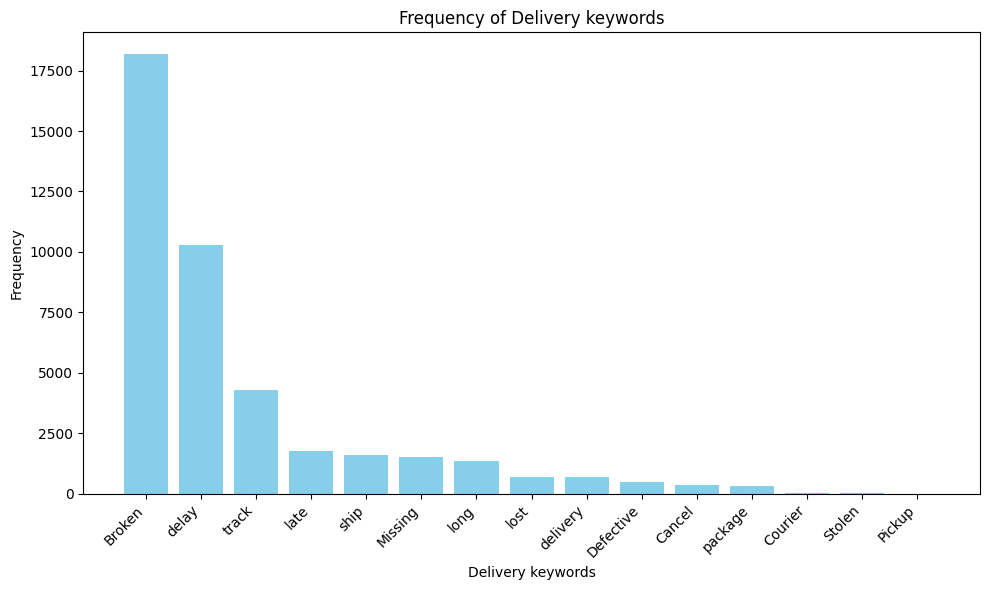

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Define product categories and subcategories
delivery_keywords = {
    'delivery': ['pitch', 'manner_of_speaking', 'saving', 'delivery', 'deliverance', 'bringing', 'obstetrical_delivery', 'legal_transfer', 'rescue', 'livery', 'speech'],
    'delay': ['time_lag', 'check', 'wait', 'postponement', 'stay', 'hold_up', 'holdup', 'delay', 'retard', 'detain', 'hold'],
    'ship': ['ship', 'send', 'embark', 'transport'],
    'package': ['computer_software', 'package', 'software', 'software_package', 'box', 'packet', 'parcel', 'software_program', 'bundle', 'software_system'],
    'track': ['rail', 'get_over', 'cut_through', 'course', 'racecourse', 'lead', 'tag', 'give_chase', 'go_after', 'data_track', 'runway', 'chase', 'rails', 'trail', 'caterpillar_tread', 'dog', 'get_across', 'cart_track', 'cut_across', 'running', 'cover', 'chase_after', 'traverse', 'racetrack', 'cartroad', 'track', 'raceway', 'pass_over', 'path', 'tail', 'caterpillar_track', 'cut', 'cross'],
    'long': ['tenacious', 'foresightful', 'farsighted', 'yearn', 'retentive', 'prospicient', 'longsighted', 'recollective', 'foresighted', 'farseeing', 'hanker', 'long'],
    'Pickup': ['getaway', 'pick-me-up', 'pickup', 'cartridge', 'tone_arm', 'pickup_arm', 'pickup_truck'],
    'Courier': ['courier', 'messenger'],
    'lost': ['recede', 'drop_off', 'befuddled', 'confused', 'bemused', 'at_sea', 'turn_a_loss', 'confounded', 'bewildered', 'baffled', 'lost', 'lose', 'deep_in_thought', 'fall_behind', 'preoccupied', 'mazed', 'mixed-up', 'mislay', 'fall_back', 'disoriented', 'helpless', 'misplace', 'miss', 'missed', 'doomed', 'suffer'],
    'late': ['of_late', 'belated', 'latterly', 'late', 'recent', 'former', 'tardy', 'lately', 'later', 'recently', 'belatedly', 'previous', 'deep', 'tardily'],
    'Broken': ['crushed', 'intermit', 'offend', 'go', 'wear', 'let_on', 'broken_in', 'get_around', 'confused', 'break-dance', 'impoverished', 'transgress', 'go_bad', 'low', 'unkept', 'relegate', 'divulge', 'breach', 'fail', 'wiped_out', 'crack', 'fracture', 'ruin', 'expose', 'humiliated', 'demote', 'give_away', 'give', 'dampen', 'discover', 'discontinue', 'fall_apart', 'burst', 'come_apart', 'founder', 'fall_in', 'break_in', 'part', 'break_down', 'disordered', 'snap_off', 'erupt', 'soften', 'break_up', 'give_out', 'busted', 'better', 'reveal', 'rugged', 'conk_out', 'pause', 'cave_in', 'break_dance', 'damp', 'weaken', 'go_against', 'bring_out', 'develop', 'split', 'infract', 'bankrupt', 'disclose', 'recrudesce', 'upset', 'smash', 'unwrap', 'collapse', 'break_away', 'interrupt', 'bump', 'separate', 'let_out', 'wear_out', 'bust', 'split_up', 'stop', 'give_way', 'violate', 'kick_downstairs', 'break_out', 'check', 'die', 'get_out', 'break_off', 'humbled', 'break', 'broken'],
    'Missing': ['lacking', 'wanting', 'lose', 'miss', 'absent', 'drop', 'omit', 'leave_out', 'overlook', 'neglect', 'overleap', 'escape', 'missing', 'pretermit', 'lack'],
    'Cancel': ['strike_down', 'delete', 'scratch', 'natural', 'cancel', 'offset', 'scrub', 'call_off', 'set_off', 'invalidate'],
    'Stolen': ['steal', 'slip'],
    'Defective': ['faulty', 'defective', 'bad']
}

# Initialize an empty list to store the frequency counts
frequency_counts = []

# Iterate through each product category
for category, subcategories in tqdm(delivery_keywords.items(), desc="Delivery keywords"):
    # Count occurrences of each category and subcategory in the 'lemmatized_tokens' column
    for subcategory in subcategories:
        count = df['lemmatized_tokens'].str.contains(subcategory).sum()
        frequency_counts.append([category, subcategory, count])

# Create a new DataFrame with the frequency counts
df_keyword = pd.DataFrame(frequency_counts, columns=['Keywords', 'Sub-keywords', 'Frequency'])

# Group by Category and sum the frequencies
df_summary = df_keyword.groupby('Keywords')['Frequency'].sum().reset_index()

# Sort the DataFrame in descending order of Frequency
df_summary = df_summary.sort_values(by='Frequency', ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_summary['Keywords'], df_summary['Frequency'], color='skyblue')
plt.xlabel('Delivery keywords')
plt.ylabel('Frequency')
plt.title('Frequency of Delivery keywords')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Save the df_keyword DataFrame
df_keyword.to_csv('df_delivery_by_frequency_1.csv', index=False)

##**8.4 Promotions and Discounts**

##**8.5 Market and Trends**

##**8.6 Health and Safety**